# Data Exploration Notebook Structure

## 1. Set Up Environment

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import matplotlib.dates as mdates

# Set styling for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Display more columns
pd.set_option('display.max_columns', 50)

## 2. Load Data

In [5]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime
import matplotlib.dates as mdates

# Set styling for plots
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('viridis')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Display more columns
pd.set_option('display.max_columns', 50)

# Define path to data using absolute path
# Replace this with your actual path
base_dir = 'C:/Users/micha/OneDrive/Desktop/Projects/github/1/investment-portfolio-analytics'
data_dir = os.path.join(base_dir, 'data/raw')

# Check if the directory exists
print(f"Checking if directory exists: {data_dir}")
print(f"Directory exists: {os.path.exists(data_dir)}")

# List files in the directory
if os.path.exists(data_dir):
    print("\nFiles in directory:")
    for file in os.listdir(data_dir):
        print(f" - {file}")
else:
    print("\nDirectory not found!")

# Load stock price data
try:
    stock_data = pd.read_parquet(os.path.join(data_dir, 'stock_prices.parquet'))
    print("\nSuccessfully loaded stock data")
except FileNotFoundError as e:
    print(f"\nError loading stock data: {e}")
    
# Continue with the rest of your code only if the previous step succeeded
if 'stock_data' in locals():
    # Load economic indicators
    economic_data = pd.read_parquet(os.path.join(data_dir, 'economic_indicators.parquet'))
    
    # Load World Bank data
    world_bank_data = pd.read_parquet(os.path.join(data_dir, 'world_bank_data.parquet'))
    
    # Load Fama-French factors
    factors_data = pd.read_parquet(os.path.join(data_dir, 'fama_french_factors.parquet'))
    
    print("All data loaded successfully!")

Checking if directory exists: C:/Users/micha/OneDrive/Desktop/Projects/github/1/investment-portfolio-analytics\data/raw
Directory exists: True

Files in directory:
 - economic_indicators.parquet
 - fama_french_factors.parquet
 - stock_prices.parquet
 - world_bank_data.parquet

Successfully loaded stock data
All data loaded successfully!


## 3. Explore Stock Data

Stock data shape: (3812, 48)

Stock data columns structure:
MultiIndex([('GLD',          'Open'),
            ('GLD',          'High'),
            ('GLD',           'Low'),
            ('GLD',         'Close'),
            ('GLD',        'Volume'),
            ('GLD',     'Dividends'),
            ('GLD',  'Stock Splits'),
            ('GLD', 'Capital Gains'),
            ('AGG',          'Open'),
            ('AGG',          'High'),
            ('AGG',           'Low'),
            ('AGG',         'Close'),
            ('AGG',        'Volume'),
            ('AGG',     'Dividends'),
            ('AGG',  'Stock Splits'),
            ('AGG', 'Capital Gains'),
            ('VNQ',          'Open'),
            ('VNQ',          'High'),
            ('VNQ',           'Low'),
            ('VNQ',         'Close'),
            ('VNQ',        'Volume'),
            ('VNQ',     'Dividends'),
            ('VNQ',  'Stock Splits'),
            ('VNQ', 'Capital Gains'),
            ('VWO',         

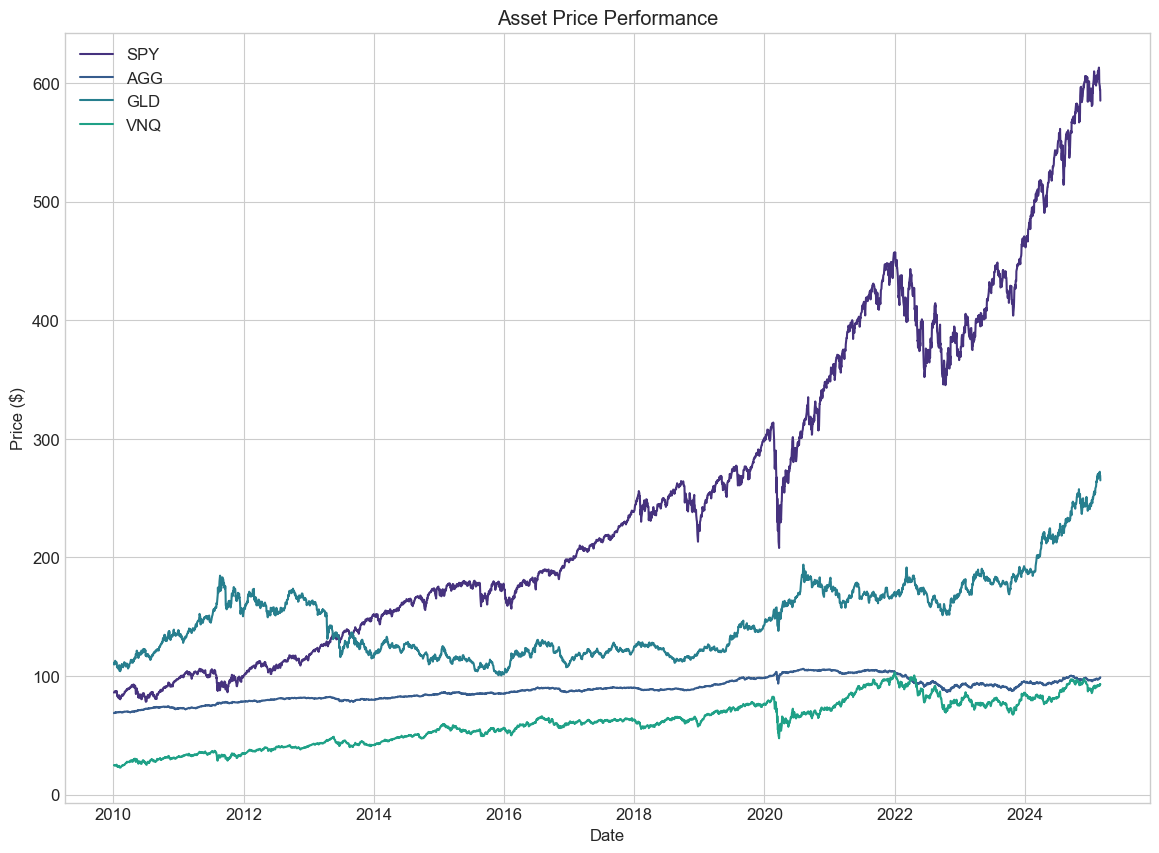

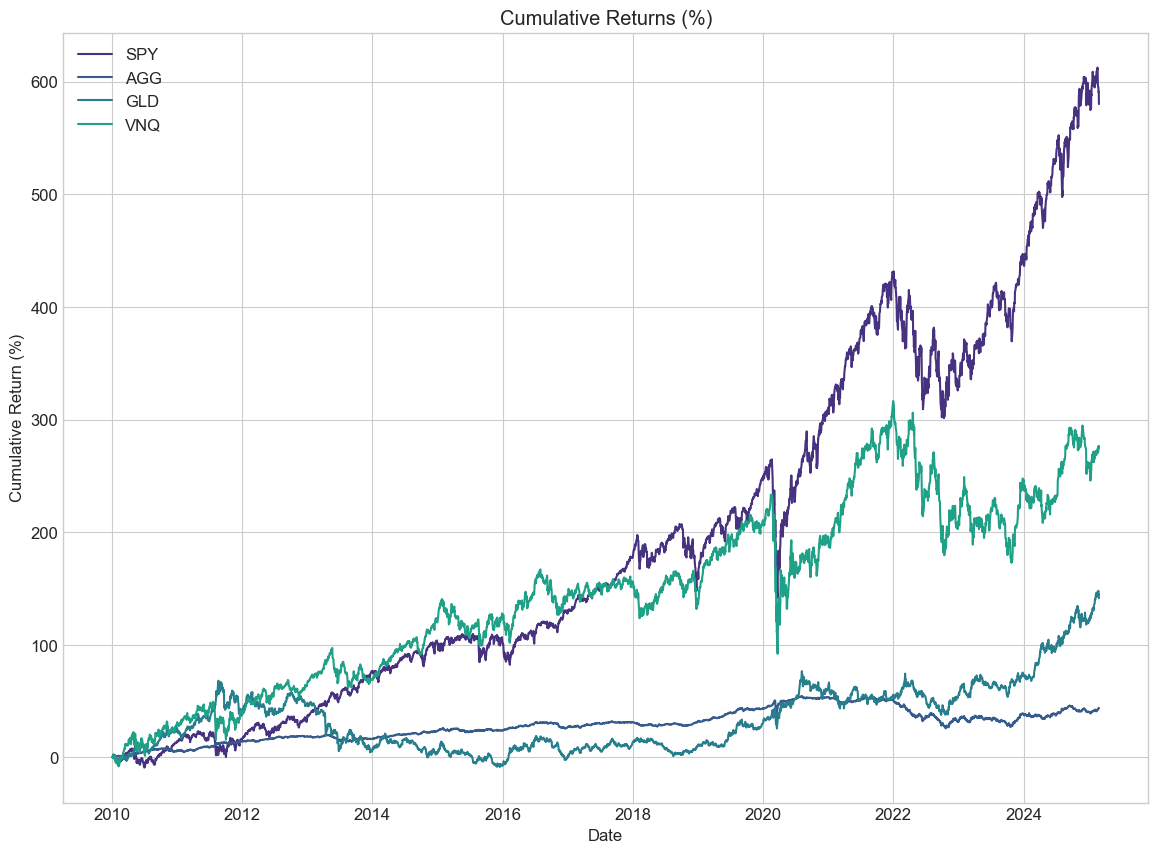

In [6]:
# Display basic information about the stock dataset
print("Stock data shape:", stock_data.shape)
print("\nStock data columns structure:")
print(stock_data.columns)

# Check first few rows
print("\nFirst few rows of stock data:")
stock_data.head()

# Check for missing values
print("\nMissing values in stock data:")
print(stock_data.isna().sum().sum())

# Get summary statistics
print("\nSummary statistics for SPY:")
stock_data['SPY']['Close'].describe()

# Plot stock prices
plt.figure(figsize=(14, 10))
for ticker in ['SPY', 'AGG', 'GLD', 'VNQ']:
    plt.plot(stock_data.index, stock_data[ticker]['Close'], label=ticker)
plt.title('Asset Price Performance')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate and plot returns
returns = pd.DataFrame()
for ticker in ['SPY', 'AGG', 'GLD', 'VNQ']:
    returns[ticker] = stock_data[ticker]['Close'].pct_change()

# Calculate cumulative returns
cumulative_returns = (1 + returns).cumprod() - 1

plt.figure(figsize=(14, 10))
for ticker in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[ticker] * 100, label=ticker)
plt.title('Cumulative Returns (%)')
plt.xlabel('Date')
plt.ylabel('Cumulative Return (%)')
plt.legend()
plt.grid(True)
plt.show()

<b>Analysis of Your Investment Portfolio Data</b>

<b>What the Tickers Represent<b/>

The tickers are ETFs (Exchange-Traded Funds) that represent different asset classes:

    SPY: SPDR S&P 500 ETF - Tracks the S&P 500 index (large-cap U.S. stocks)
    AGG: iShares Core U.S. Aggregate Bond ETF - Tracks the U.S. bond market
    GLD: SPDR Gold Shares - Tracks the price of gold
    VNQ: Vanguard Real Estate ETF - Tracks the U.S. real estate market
    VWO: Vanguard FTSE Emerging Markets ETF - Tracks emerging market stocks
    VEA: Vanguard FTSE Developed Markets ETF - Tracks developed market stocks (excluding U.S.)

<b>Data Structure Explanation<b/>

The Stock data shape: (3812, 48) indicates you have 3,812 rows (trading days from 2010 to 2025) and 48 columns. The 48 columns represent 6 ETFs with 8 data points each:
Each ETF has 8 columns:

    Open, High, Low, Close (price data)
    Volume (trading volume)
    Dividends (dividend payments)
    Stock Splits (when shares split)
    Capital Gains (distributions of capital gains)

The structure is organized as a MultiIndex DataFrame, with the first level being the ticker symbol and the second level being the data type.

<b>Image 1: Asset Price Performance<b/>

This chart shows the raw price performance of the four ETFs from 2010 to 2025. Key observations:

    SPY (blue) has shown the strongest absolute price growth, increasing from under $100 to over $600
    GLD (darker green) has moderate price growth with significant volatility, particularly in 2011-2013 and 2020-2024
    AGG (purple) shows the stable performance expected from bonds, with gradual price appreciation
    VNQ (light green) shows growth with notable volatility, particularly during the 2020 COVID crash

<b>Image 2: Cumulative Returns (%)<b/>

This chart normalizes the starting point to show percentage returns rather than absolute prices, which provides a clearer picture of relative performance:

    SPY has gained over 600% during the period (a 7x return)
    VNQ (real estate) has returned around 250-300%, with high volatility
    GLD (gold) shows periods of strong performance and stagnation, with significant gains after 2020
    AGG (bonds) shows the lowest but most stable returns, around 50% over the entire period

<b>Key Investment Insights<b/>

Diversification benefits: The different asset classes clearly show different return patterns, supporting the benefits of diversification in portfolio construction.
Equity dominance: U.S. equities (SPY) have dramatically outperformed other asset classes over this period, particularly during the post-2020 market rally.
Volatility patterns: You can observe major market events like:

    The 2020 COVID crash (sharp dip in all assets except bonds)
    The 2022 market correction
    The 2022-2023 real estate market decline


Correlation insights: During the 2020 crisis, correlations increased (all assets except bonds dropped together), showing how diversification can fail during extreme market stress.
Real estate cyclicality: VNQ shows the cyclical nature of real estate investments, with significant drawdowns and recoveries.

## 4. Explore Econimic Indicators

Economic data shape: (4005, 5)

Economic data columns:
Index(['GDP', 'UNRATE', 'CPIAUCSL', 'FEDFUNDS', 'T10Y2Y'], dtype='object')

First few rows of economic data:

Missing values in economic data:
GDP         3945
UNRATE      3824
CPIAUCSL    3824
FEDFUNDS    3824
T10Y2Y       214
dtype: int64


<Figure size 1400x1000 with 0 Axes>

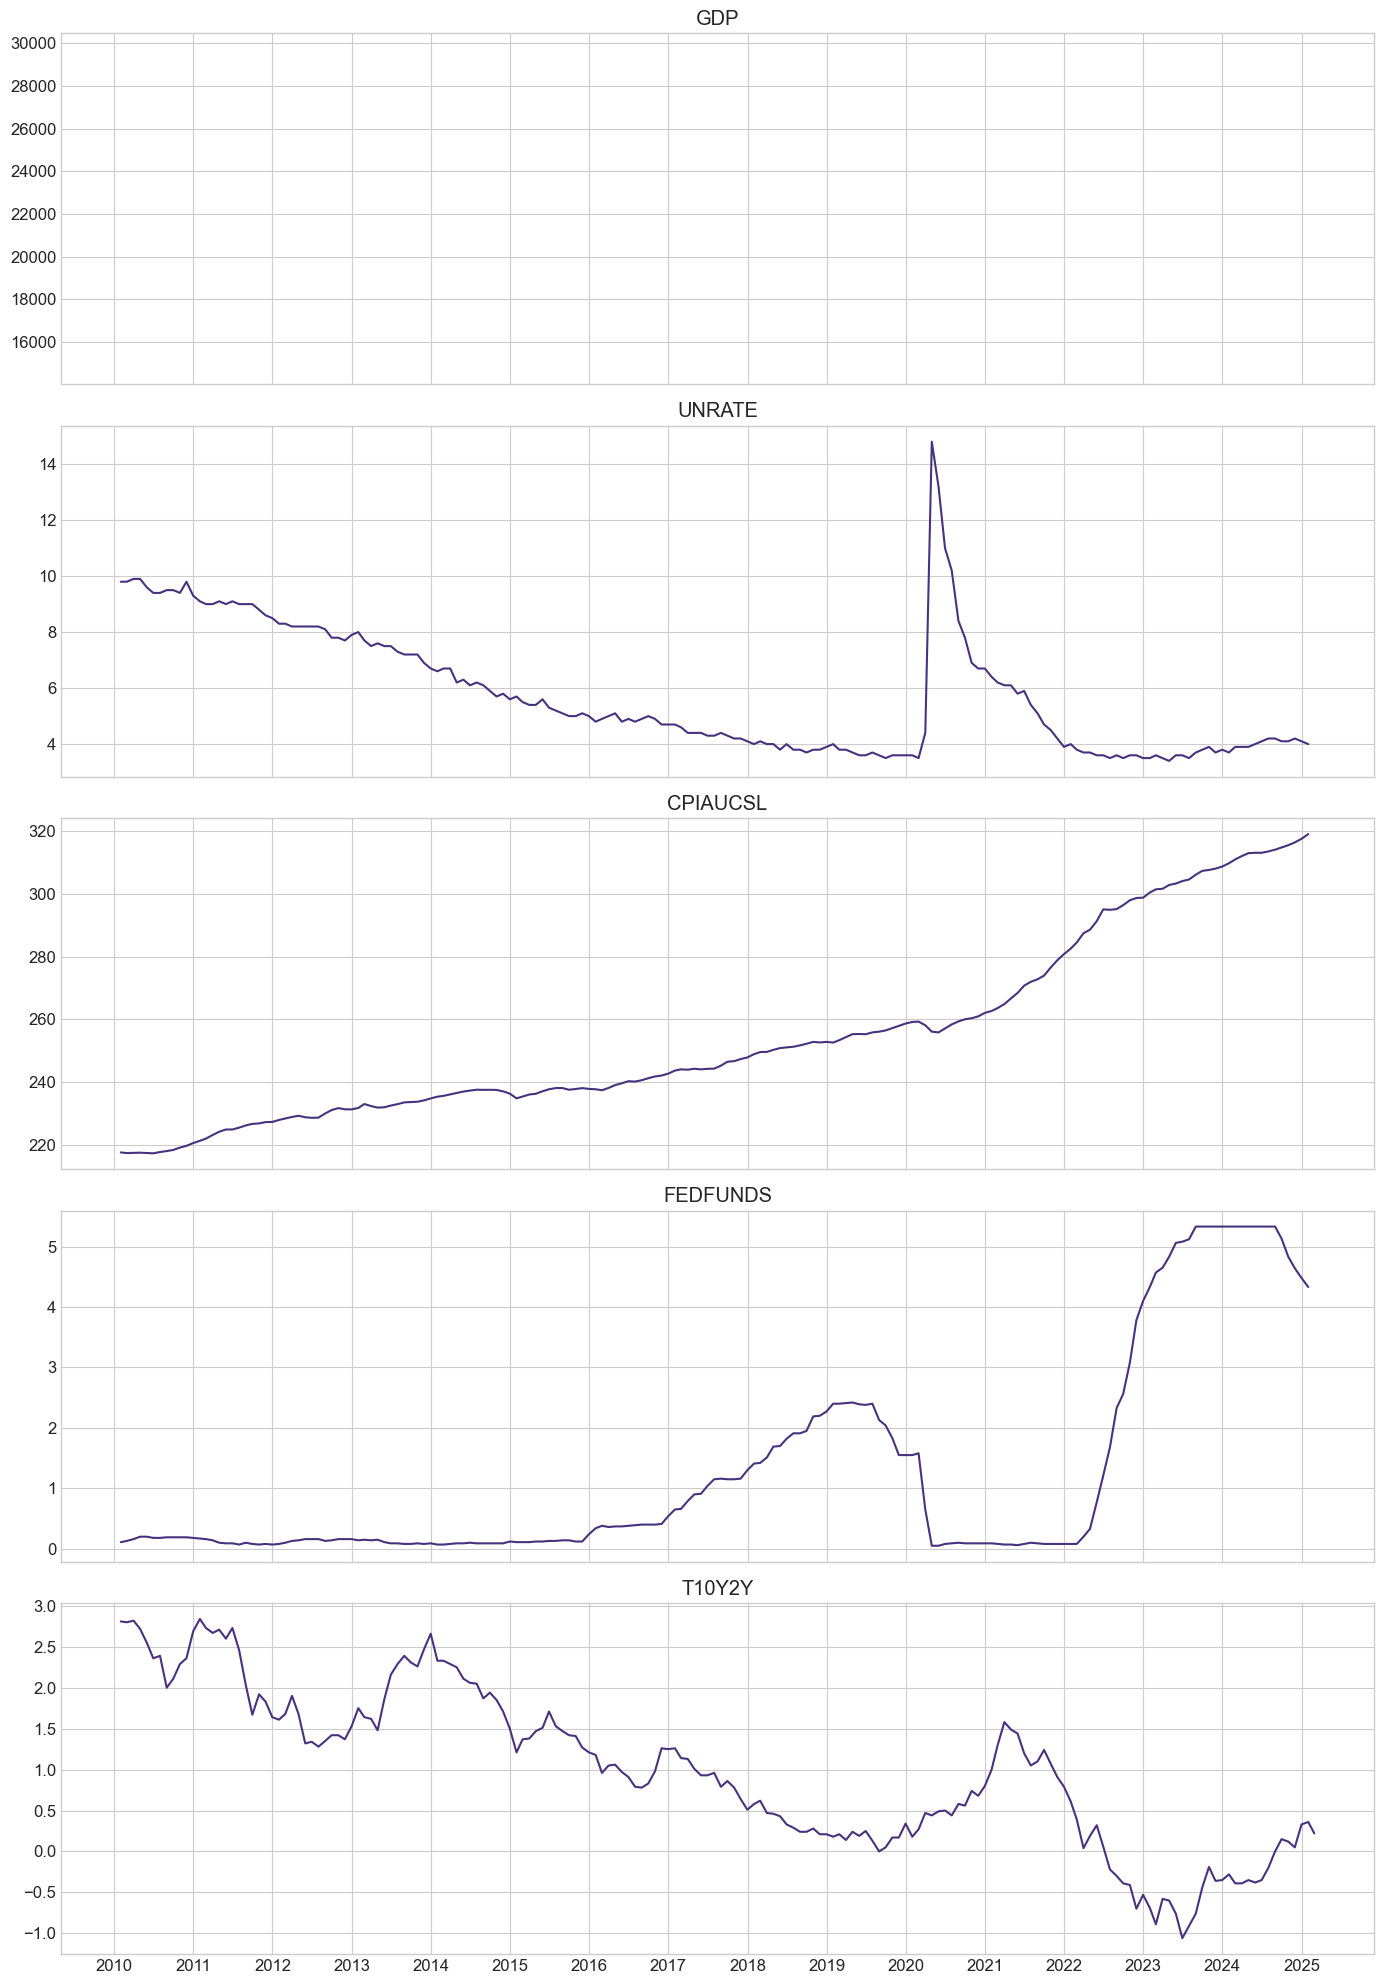

In [17]:
# Display basic information about economic data
print("Economic data shape:", economic_data.shape)
print("\nEconomic data columns:")
print(economic_data.columns)

# Check first few rows
print("\nFirst few rows of economic data:")
economic_data.head()

# Check for missing values
print("\nMissing values in economic data:")
print(economic_data.isna().sum())

# Plot economic indicators (normalizing for scale)
plt.figure(figsize=(14, 10))

# Create a subplot for each indicator
fig, axes = plt.subplots(len(economic_data.columns), 1, figsize=(14, 4*len(economic_data.columns)), sharex=True)

for i, indicator in enumerate(economic_data.columns):
    # Resample to monthly frequency for visualization
    monthly_data = economic_data[indicator].resample('ME').last()
    axes[i].plot(monthly_data.index, monthly_data)
    axes[i].set_title(f'{indicator}')
    axes[i].grid(True)
    
    # Format x-axis to show years
    years = mdates.YearLocator()
    years_fmt = mdates.DateFormatter('%Y')
    axes[i].xaxis.set_major_locator(years)
    axes[i].xaxis.set_major_formatter(years_fmt)

plt.tight_layout()
plt.show()

Available data points by indicator:
GDP data points: 60
UNRATE data points: 181
CPIAUCSL data points: 181
FEDFUNDS data points: 181
T10Y2Y data points: 3791

Sample of available data:
                 GDP  UNRATE  CPIAUCSL  FEDFUNDS  T10Y2Y
2010-01-01  14764.61     9.8   217.488      0.11     NaN
2010-01-04       NaN     NaN       NaN       NaN    2.76
2010-01-05       NaN     NaN       NaN       NaN    2.76
2010-01-06       NaN     NaN       NaN       NaN    2.84
2010-01-07       NaN     NaN       NaN       NaN    2.82
2010-01-08       NaN     NaN       NaN       NaN    2.87
2010-01-11       NaN     NaN       NaN       NaN    2.90
2010-01-12       NaN     NaN       NaN       NaN    2.82
2010-01-13       NaN     NaN       NaN       NaN    2.83
2010-01-14       NaN     NaN       NaN       NaN    2.82

Missing values after forward fill:
GDP         0
UNRATE      0
CPIAUCSL    0
FEDFUNDS    0
T10Y2Y      1
dtype: int64


C:\Users\micha\AppData\Local\Temp\ipykernel_12684\106234051.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  economic_data_filled = economic_data.fillna(method='ffill')
C:\Users\micha\AppData\Local\Temp\ipykernel_12684\106234051.py:23: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  economic_data_filled = economic_data_filled.fillna(method='bfill')
C:\Users\micha\AppData\Local\Temp\ipykernel_12684\106234051.py:33: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = economic_data_filled[indicator].resample('M').last()


<Figure size 1400x1600 with 0 Axes>

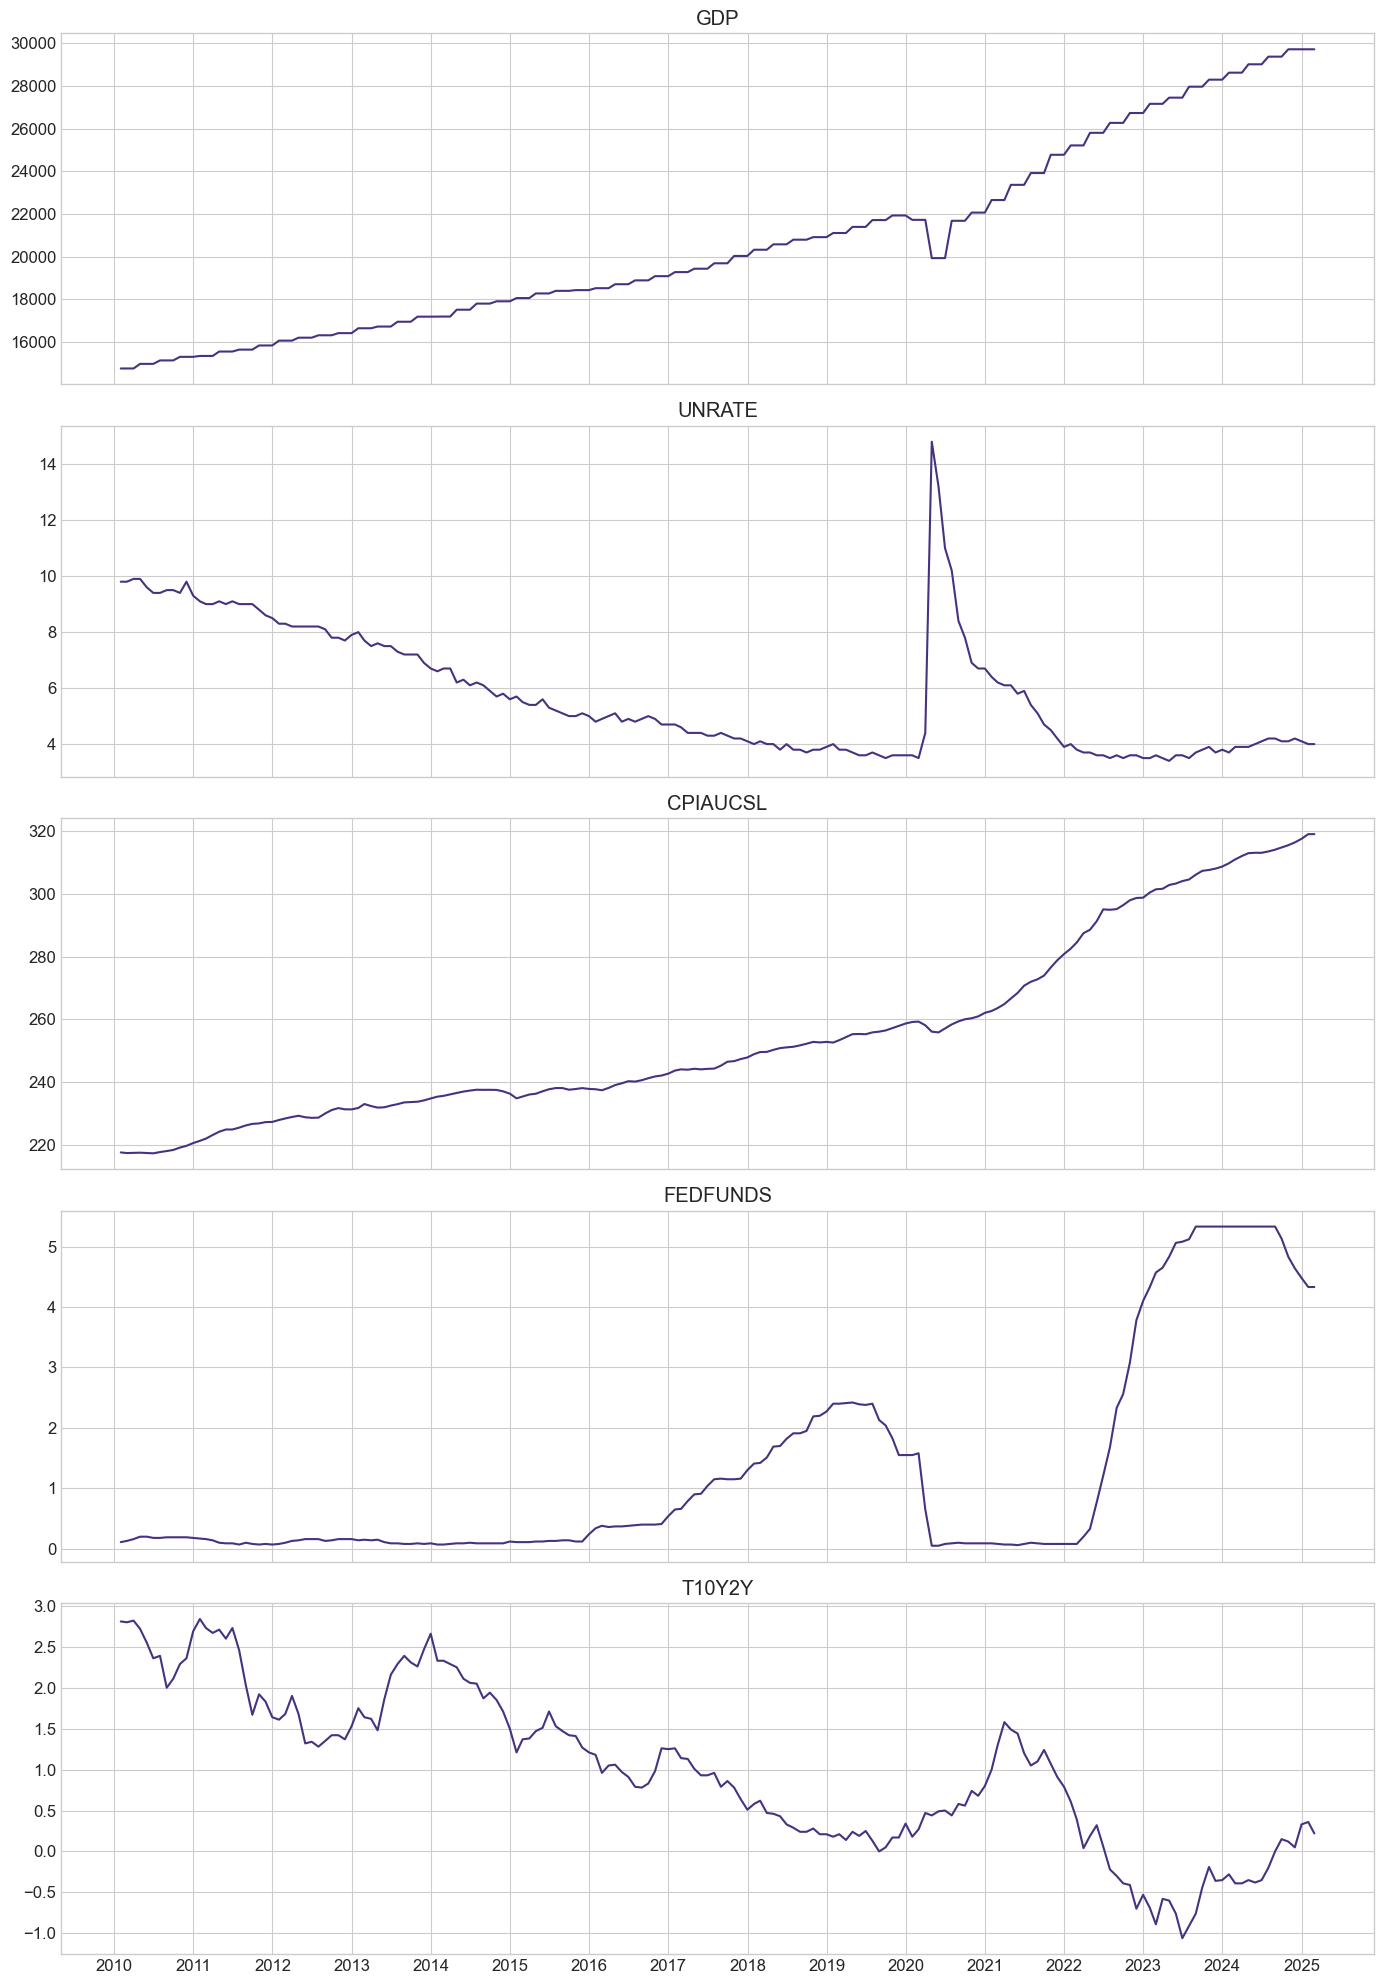

In [10]:
# Examine the frequency of available data
print("Available data points by indicator:")
print("GDP data points:", economic_data['GDP'].count())
print("UNRATE data points:", economic_data['UNRATE'].count())
print("CPIAUCSL data points:", economic_data['CPIAUCSL'].count())
print("FEDFUNDS data points:", economic_data['FEDFUNDS'].count())
print("T10Y2Y data points:", economic_data['T10Y2Y'].count())

# Let's check when values are available
print("\nSample of available data:")
non_na_data = economic_data.dropna(how='all')
print(non_na_data.head(10))

# For visualization and analysis, we need to handle the missing values
# Forward fill is appropriate for economic data that changes infrequently
economic_data_filled = economic_data.fillna(method='ffill')

# Check if we still have any missing values at the beginning of the dataset
print("\nMissing values after forward fill:")
print(economic_data_filled.isna().sum())

# If there are still missing values at the beginning, we can back fill them
economic_data_filled = economic_data_filled.fillna(method='bfill')

# Now let's visualize the data properly
plt.figure(figsize=(14, 16))

# Create a subplot for each indicator
fig, axes = plt.subplots(len(economic_data_filled.columns), 1, figsize=(14, 4*len(economic_data_filled.columns)), sharex=True)

for i, indicator in enumerate(economic_data_filled.columns):
    # Resample to monthly frequency for visualization
    monthly_data = economic_data_filled[indicator].resample('M').last()
    axes[i].plot(monthly_data.index, monthly_data)
    axes[i].set_title(f'{indicator}')
    axes[i].grid(True)
    
    # Format x-axis to show years
    years = mdates.YearLocator()
    years_fmt = mdates.DateFormatter('%Y')
    axes[i].xaxis.set_major_locator(years)
    axes[i].xaxis.set_major_formatter(years_fmt)

plt.tight_layout()
plt.show()

Available data points by indicator:
GDP data points: 60
UNRATE data points: 181
CPIAUCSL data points: 181
FEDFUNDS data points: 181
T10Y2Y data points: 3791

Sample of available data:
                 GDP  UNRATE  CPIAUCSL  FEDFUNDS  T10Y2Y
2010-01-01  14764.61     9.8   217.488      0.11     NaN
2010-01-04       NaN     NaN       NaN       NaN    2.76
2010-01-05       NaN     NaN       NaN       NaN    2.76
2010-01-06       NaN     NaN       NaN       NaN    2.84
2010-01-07       NaN     NaN       NaN       NaN    2.82
2010-01-08       NaN     NaN       NaN       NaN    2.87
2010-01-11       NaN     NaN       NaN       NaN    2.90
2010-01-12       NaN     NaN       NaN       NaN    2.82
2010-01-13       NaN     NaN       NaN       NaN    2.83
2010-01-14       NaN     NaN       NaN       NaN    2.82


<Figure size 1400x2000 with 0 Axes>

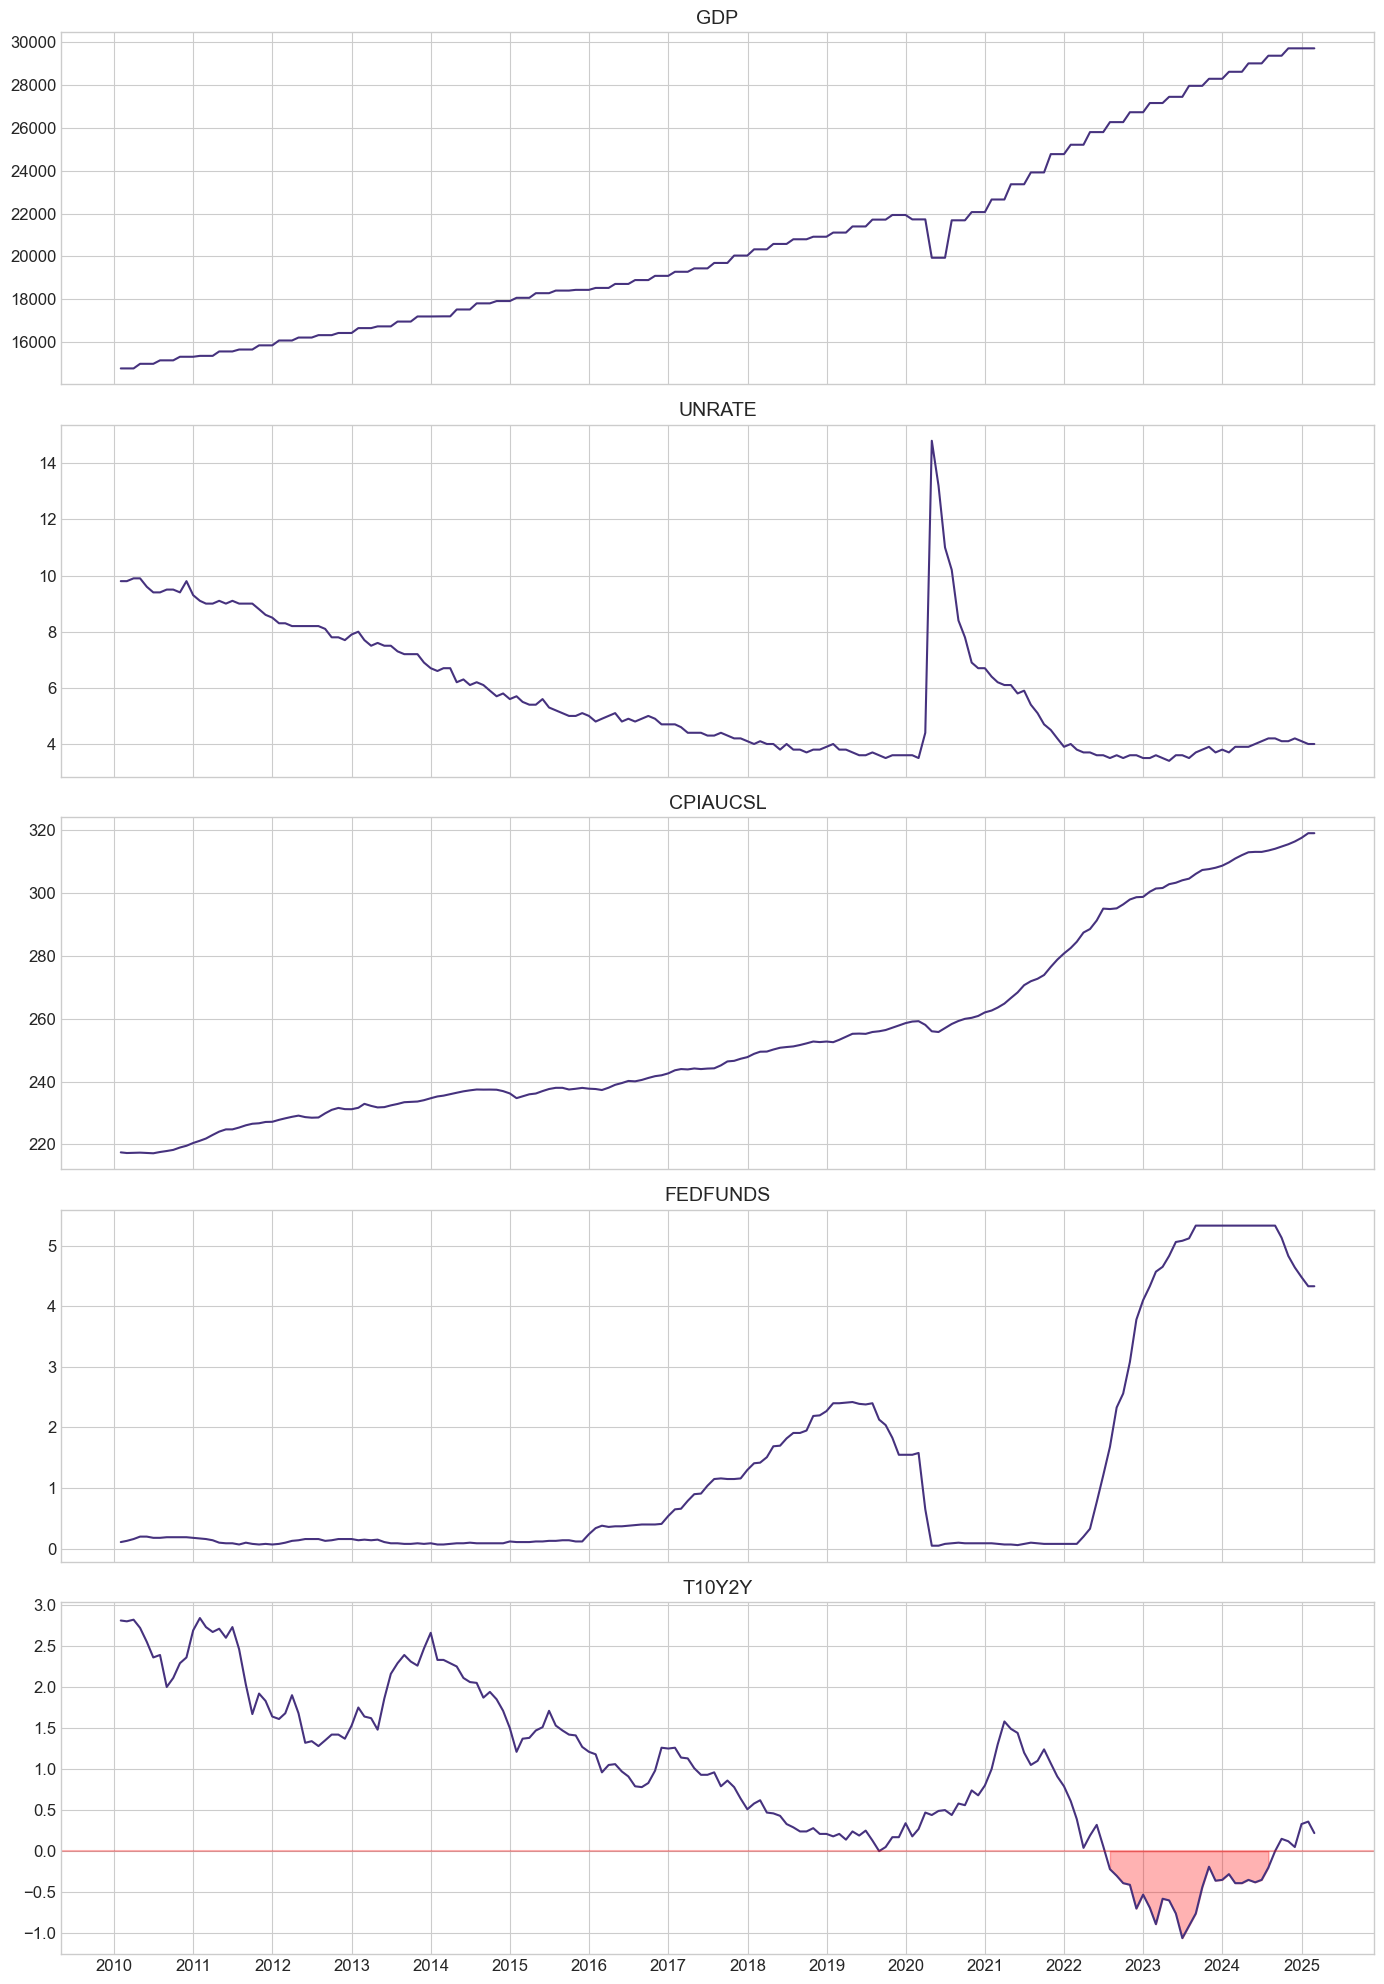


Updating data with non-deprecated methods:


In [12]:
# Examine the frequency of available data
print("Available data points by indicator:")
print("GDP data points:", economic_data['GDP'].count())
print("UNRATE data points:", economic_data['UNRATE'].count())
print("CPIAUCSL data points:", economic_data['CPIAUCSL'].count())
print("FEDFUNDS data points:", economic_data['FEDFUNDS'].count())
print("T10Y2Y data points:", economic_data['T10Y2Y'].count())

# Let's check when values are available
print("\nSample of available data:")
non_na_data = economic_data.dropna(how='all')
print(non_na_data.head(10))

# Update the visualization code to fix the issues
plt.figure(figsize=(14, 20))

# Create a new figure with subplots
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(14, 20), sharex=True)

# Update the date resampling method to address the deprecation warning
for i, indicator in enumerate(economic_data_filled.columns):
    # Use 'ME' instead of 'M' for month end resampling
    monthly_data = economic_data_filled[indicator].resample('ME').last()
    axes[i].plot(monthly_data.index, monthly_data)
    axes[i].set_title(f'{indicator}', fontsize=14)
    axes[i].grid(True)
    
    # Format x-axis to show years
    years = mdates.YearLocator()
    years_fmt = mdates.DateFormatter('%Y')
    axes[i].xaxis.set_major_locator(years)
    axes[i].xaxis.set_major_formatter(years_fmt)
    
    # Add a horizontal line at zero for T10Y2Y (yield curve indicator)
    if indicator == 'T10Y2Y':
        axes[i].axhline(y=0, color='r', linestyle='-', alpha=0.3)
        axes[i].fill_between(monthly_data.index, 0, monthly_data, 
                            where=(monthly_data < 0), color='r', alpha=0.3)

plt.tight_layout()
plt.show()

# Also address the other deprecation warnings
print("\nUpdating data with non-deprecated methods:")
# Use ffill() and bfill() instead of fillna(method='ffill')
economic_data_clean = economic_data.ffill().bfill()

<b>Analysis of Economic Indicators and Investment Implications<b/>

<b>1. GDP (Gross Domestic Product)<b/>

Key Observations:

    Overall upward trend from approximately $15 trillion in 2010 to nearly $30 trillion by 2025
    Notable sharp decline in 2020 (COVID-19 pandemic) with GDP dropping by roughly 10%
    Strong recovery post-2020 with accelerated growth
    Steady growth trend since recovery with minor quarterly variations

Investment Implications:

    The long-term growth trajectory supports a strategic allocation to equities, which tend to perform well during economic expansion
    The 2020 downturn demonstrates the importance of defensive assets during economic crises
    The quick recovery showed that staying invested through downturns can be beneficial
    The steeper slope of the GDP curve post-2020 indicates stronger economic growth, which historically favors cyclical sectors like technology, consumer discretionary, and industrials

<b>2. UNRATE (Unemployment Rate)<b/>

Key Observations:

    Started near 10% in 2010 (aftermath of the 2008 financial crisis)
    Steady decline from 2010-2019, reaching historically low levels around 3.5% by 2019
    Dramatic spike to approximately 15% during the COVID-19 pandemic in 2020
    Rapid recovery post-pandemic to pre-pandemic levels by 2022
    Recent stabilization around 4%

Investment Implications:

    Low unemployment periods (2018-2019, 2022-2024) typically favor consumer discretionary and retail sectors due to stronger consumer spending
    The rapid spike in 2020 shows how quickly labor market conditions can deteriorate, highlighting the need for portfolio resilience
    The unemployment trend can signal potential Fed policy changes - decreasing unemployment often precedes interest rate increases
    Periods of rapidly falling unemployment (2020-2022) often represent economic recovery phases where cyclical stocks tend to outperform

<b>3. CPIAUCSL (Consumer Price Index for All Urban Consumers)<b/>

Key Observations:

    Relatively stable and moderate inflation from 2010-2020 (index rising from ~220 to ~260)
    Dramatic acceleration in inflation starting in 2021, with the index increasing from ~260 to ~320 by 2025
    The slope of the increase moderated somewhat in 2023-2025 but remains elevated compared to pre-2021

Investment Implications:

    The significant inflation surge post-2020 eroded the real returns of fixed-income investments
    During the high inflation period (2021-2023), traditional inflation hedges like TIPS, commodities, and real estate would have been valuable
    Companies with pricing power and low debt levels typically perform better during inflationary periods
    The recent moderation suggests inflation may be coming under control, which could be supportive for both equities and bonds
    Sustained elevated inflation has significant implications for portfolio construction, potentially favoring value stocks over growth stocks

<b>4. FEDFUNDS (Federal Funds Rate)<b/>

Key Observations:

Near-zero interest rate environment from 2010-2015 (post-financial crisis)
Gradual rate increases from 2016-2019, reaching about 2.5%
Rapid cut to near zero in response to COVID-19 pandemic in 2020
Extended period of near-zero rates from 2020-2022
Aggressive rate hiking cycle in 2022-2023, reaching over 5%
Recent modest decline in rates in early 2025

Investment Implications:

    The extended low-rate environment (2010-2015, 2020-2022) supported higher equity valuations and real estate investments
    Rising rate periods (2016-2019, 2022-2023) typically pressure growth stocks and increase borrowing costs
    The rapid rate increases in 2022-2023 likely contributed to market volatility and sectoral rotation
    The recent rate decline suggests the beginning of a new monetary policy cycle
    Bond portfolios with shorter durations would have performed better during the rising rate environment of 2022-2023
    Dividend stocks often face pressure during rising rate environments as bonds become more competitive for income-seeking investors

<b>5. T10Y2Y (10-Year Treasury Yield Minus 2-Year Treasury Yield)<b/>

Key Observations:

    Generally positive yield curve (10-year yields higher than 2-year yields) throughout most of the period
    Steady decline in the spread from 2010-2019
    Brief inversion (negative values) in 2019 before the pandemic
    Recovery to positive territory during 2020-2021
    Significant inversion during 2022-2023 (reaching nearly -1%)
    Recent return to positive territory in 2024-2025

Investment Implications:

    Yield curve inversions (negative values) have historically been reliable recession predictors
    The 2019 inversion preceded the 2020 recession (though the pandemic was the immediate cause)
    The deep inversion in 2022-2023 signaled recession concerns, warranting defensive positioning
    Recent normalization suggests reduced recession risk, potentially supporting cyclical sectors
    During inversions, defensive sectors (utilities, consumer staples, healthcare) typically outperform
    The transitions between positive and negative yield curves often mark major inflection points for investment strategy

<b>Integrated Analysis and Portfolio Strategy Implications<b/>

These economic indicators collectively provide a framework for making strategic asset allocation decisions:

    Growth Phase (2010-2019, 2021-2024): Characterized by rising GDP, falling unemployment, and moderate inflation

        Strategy: Overweight equities, particularly growth and cyclical sectors
        Asset Classes: US large-cap stocks, international developed markets, moderate bond allocation


    Crisis Phase (2020): Marked by GDP contraction, unemployment spike, and monetary stimulus

        Strategy: Defensive positioning, focus on quality
        Asset Classes: Government bonds, gold, defensive equities, cash


    Inflation Surge Phase (2021-2023): High inflation, rising interest rates

        Strategy: Inflation protection, reduced duration, value over growth
        Asset Classes: TIPS, commodities, value stocks, short-duration bonds


    Current Phase (2024-2025): Moderating inflation, potentially peaking interest rates, positive growth

        Strategy: Balanced approach with recession monitoring (watching yield curve)
        Asset Classes: Diversified equity exposure, increasing bond allocation as rates stabilize

This analysis demonstrates the importance of adjusting portfolio allocations based on changing economic conditions, and how a multi-asset approach can help navigate different market environments.

## 4. Explore Fama-French Factors

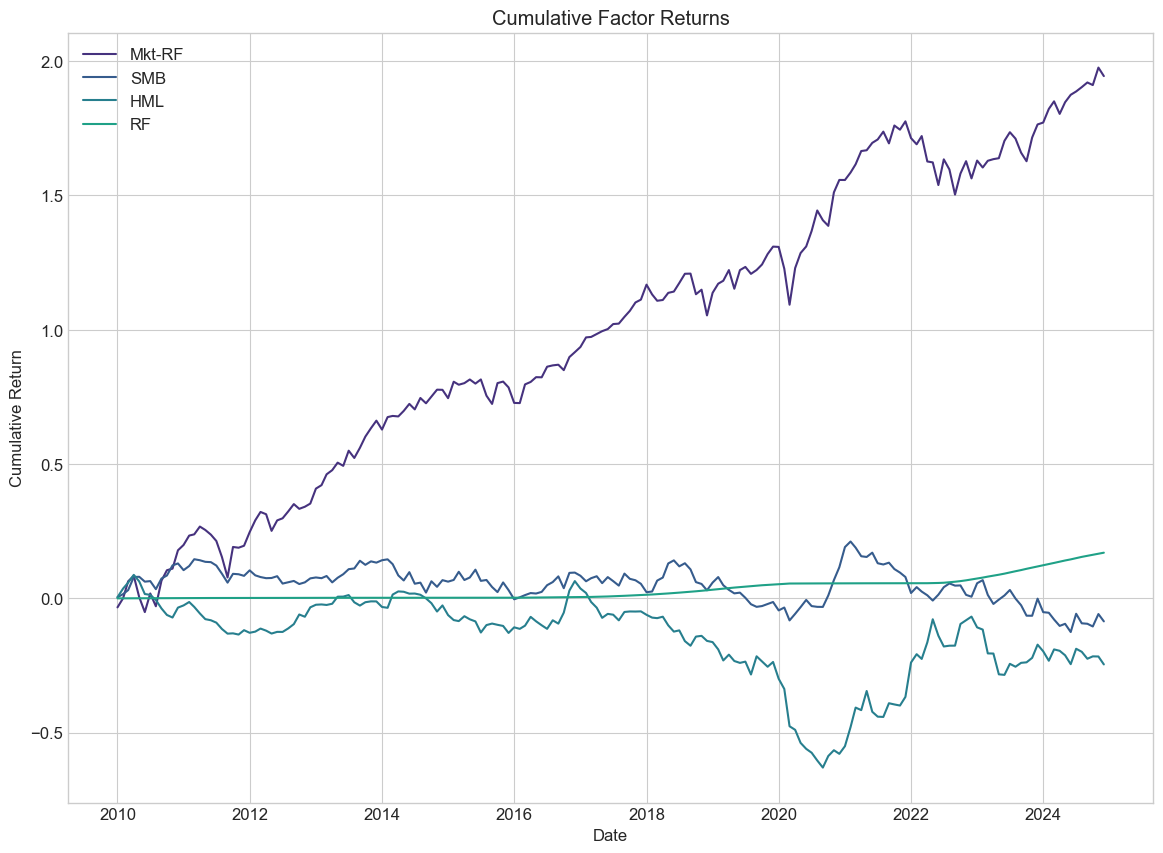

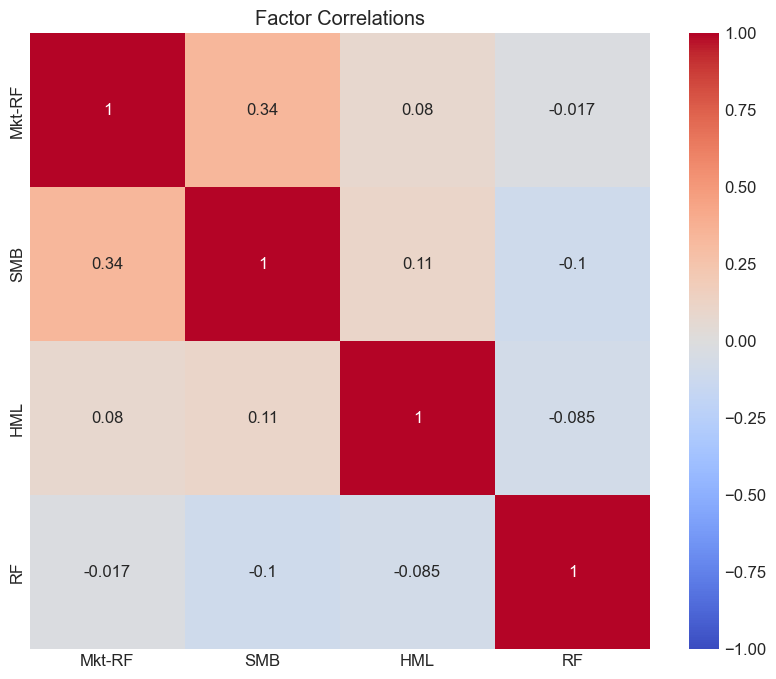


Factor Summary Statistics:
           Mkt-RF         SMB         HML          RF
count  180.000000  180.000000  180.000000  180.000000
mean     0.010803   -0.000476   -0.001367    0.000944
std      0.043711    0.025916    0.032767    0.001434
min     -0.133900   -0.059600   -0.138800    0.000000
25%     -0.015350   -0.019825   -0.019000    0.000000
50%      0.013950    0.000200   -0.004150    0.000100
75%      0.035100    0.014800    0.013575    0.001425
max      0.136500    0.075000    0.128000    0.004800


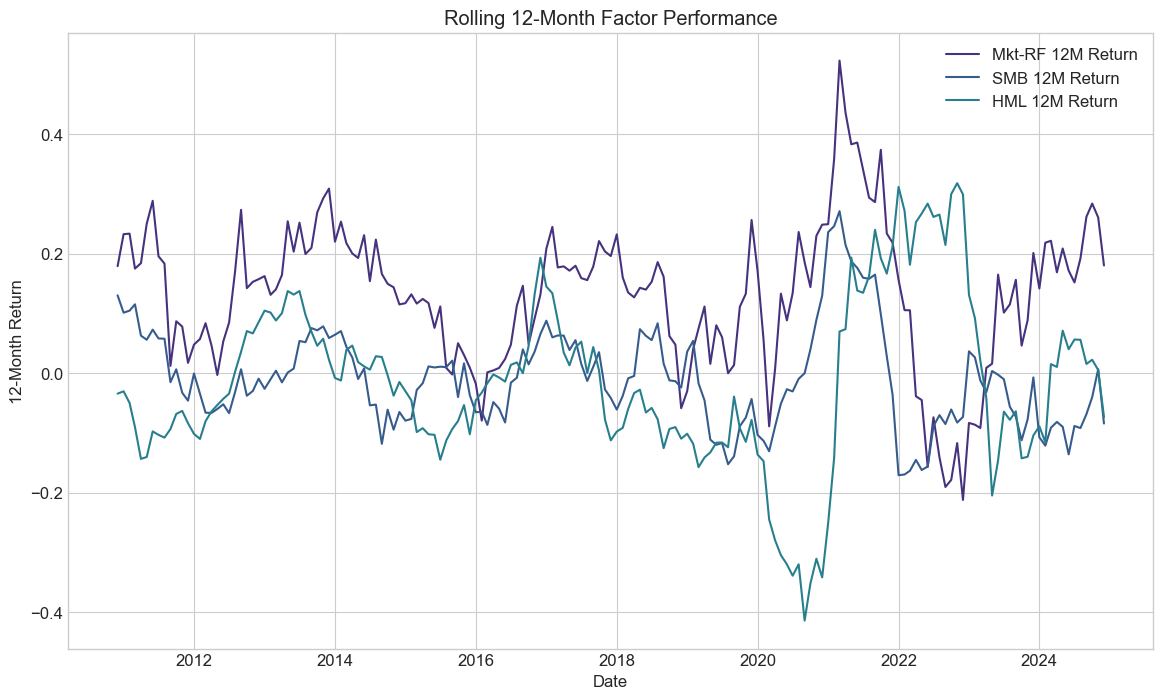

In [15]:
# Convert PeriodIndex to DatetimeIndex
factors_data_fixed = factors_data.copy()
factors_data_fixed.index = factors_data_fixed.index.to_timestamp()

# Now plot the data with the fixed index
plt.figure(figsize=(14, 10))
for factor in factors_data_fixed.columns:
    plt.plot(factors_data_fixed.index, factors_data_fixed[factor].cumsum(), label=factor)
plt.title('Cumulative Factor Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.legend()
plt.grid(True)
plt.show()

# Calculate factor correlations
plt.figure(figsize=(10, 8))
sns.heatmap(factors_data_fixed.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Factor Correlations')
plt.show()

# Print summary statistics for the factors
print("\nFactor Summary Statistics:")
print(factors_data_fixed.describe())

# Calculate rolling 12-month performances
rolling_window = 12  # 12 months rolling window
rolling_returns = factors_data_fixed.rolling(rolling_window).sum()

plt.figure(figsize=(14, 8))
for factor in factors_data_fixed.columns:
    if factor != 'RF':  # Skip risk-free rate for clarity
        plt.plot(rolling_returns.index, rolling_returns[factor], label=f"{factor} 12M Return")
plt.title('Rolling 12-Month Factor Performance')
plt.xlabel('Date')
plt.ylabel('12-Month Return')
plt.legend()
plt.grid(True)
plt.show()

## <b>Explanation of Fama-French Factors<b/>

The Fama-French factors are key components of a widely used asset pricing model. Let me explain each one:

<b>Mkt-RF (Market Return minus Risk-Free Rate):<b/>

    This is the equity risk premium, representing the excess return of the overall market over the risk-free rate
    Also known as the market factor or market premium
    Captures systematic market risk


<b>SMB (Small Minus Big):<b/>

    Represents the return differential between small-cap and large-cap stocks
    Positive values indicate small-cap stocks outperforming large-cap stocks
    Captures the "size premium" in equity markets


<b>HML (High Minus Low):<b/>

    Represents the return differential between value stocks (high book-to-market) and growth stocks (low book-to-market)
    Positive values indicate value stocks outperforming growth stocks
    Captures the "value premium" in equity markets


<b>RF (Risk-Free Rate):<b/>

    The return on a risk-free investment (typically Treasury bills)
    Used as the baseline for calculating excess returns

<b>Investment Implications<b/>

These factors provide crucial insights for portfolio construction:

<b>Market Factor (Mkt-RF):<b/>

    The primary driver of equity returns
    During periods of strong positive market factor returns, a higher beta strategy is typically rewarded
    During negative periods, low-beta strategies or hedging is valuable

<b>Size Factor (SMB):<b/>

    When SMB is positive, allocating to small-cap stocks can enhance returns
    Long-term investment strategies often include a small-cap tilt to capture this premium
    Small-cap exposure typically increases portfolio volatility

<b>Value Factor (HML):<b/>

    When HML is positive, value investing strategies outperform
    Value and growth tend to rotate leadership over market cycles
    The 2010s saw extended underperformance of value, but this has changed in recent years

<b>Multi-Factor Strategies:<b/>

    Combining exposures to these factors can create more robust portfolios
    Factor diversification helps manage risk and smooth returns
    ETFs and quantitative funds often target specific factor exposures

# Analysis of Fama-French Factor Data

## Overview of Cumulative Factor Returns (Image 1)

This chart demonstrates the performance of key investment factors over the 2010-2025 period:

1. **Market Factor (Mkt-RF)**:
   - Strongest performing factor with a cumulative return of approximately 200% over the period
   - Consistent upward trend with notable drawdowns in 2011, 2015-2016, 2018, 2020, and 2022
   - Represents the performance of the overall market in excess of the risk-free rate
   - This dominant performance reflects the strong bull market in US equities during this period

2. **Size Factor (SMB)**:
   - Shows modest positive performance through 2021 before declining
   - Ended the period with slightly negative cumulative returns
   - Indicates small-cap companies initially outperformed large-caps but this advantage eroded after 2021
   - The pattern suggests large companies (especially tech giants) eventually dominated market returns

3. **Value Factor (HML)**:
   - Most volatile factor with significant underperformance from 2017-2020
   - Dramatic negative performance during COVID (2020) reaching approximately -60% cumulative return
   - Strong recovery in 2021-2022 before declining again
   - Still ended the period with negative cumulative returns
   - Reflects the challenging environment for value investing during this period with growth stocks dominating

4. **Risk-Free Rate (RF)**:
   - Steadily increased with the lowest volatility
   - Gathered momentum after 2021 as interest rates rose from their near-zero levels
   - Ended with cumulative returns around 20%

## Factor Correlations (Image 2)

The correlation heatmap reveals important relationships between factors:

1. **Mkt-RF and SMB** show moderate positive correlation (0.34)
   - Market strength has some positive relationship with small-cap outperformance
   - However, correlation is not strong enough to consider these redundant exposures

2. **Low correlations between HML and other equity factors**
   - HML and Mkt-RF correlation is just 0.08
   - HML and SMB correlation is 0.11
   - Value factor provides genuine diversification benefits to a portfolio

3. **Negative correlations with RF**
   - All equity factors show slight negative correlation with the risk-free rate
   - Suggests rising interest rates create modest headwinds for equity factors
   - RF provides some hedging benefits during equity market stress

## Factor Summary Statistics (Image 3)

The summary statistics provide quantitative insights:

1. **Mean returns**:
   - Mkt-RF: 0.011 (1.1% monthly)
   - SMB: -0.0005 (slightly negative)
   - HML: -0.001 (negative)
   - RF: 0.002 (0.2% monthly)

2. **Volatility (std)**:
   - Mkt-RF: 0.043 (highest volatility)
   - SMB: 0.026
   - HML: 0.032
   - RF: 0.001 (extremely low volatility)

3. **Range of returns**:
   - Mkt-RF: -0.134 to 0.137
   - SMB: -0.096 to 0.075
   - HML: -0.139 to 0.128
   - RF: 0.000 to 0.005

These statistics highlight that while the market factor delivered the highest average returns, it also came with the highest volatility. Value investing experienced significant swings with negative average returns.

## Rolling 12-Month Factor Performance (Image 4)

This chart illustrates how factor performance varies over time:

1. **Cyclicality of factors**:
   - All factors show significant time variation in their performance
   - Rotational pattern is evident - factors move in and out of favor

2. **COVID-19 impact (2020)**:
   - Dramatic decline in HML (value stocks severely underperformed)
   - Spike in Mkt-RF after initial decline (market recovery)
   - Showcases how factor exposures can dramatically shift during crises

3. **2021-2022 value recovery**:
   - HML had its strongest performance after being at its worst
   - Demonstrates the danger of abandoning factors after poor performance

4. **Recent trends (2023-2024)**:
   - More balanced factor performance
   - Mkt-RF maintaining strength
   - Value factor becoming more stable

## Investment Implications

Based on this factor analysis, here are key implications for portfolio construction:

1. **Market exposure remains fundamental**:
   - The strong performance of Mkt-RF reinforces that broad market exposure should form the core of most portfolios
   - The consistent upward trend justifies a strategic allocation to equities

2. **Diversification across factors is valuable**:
   - Low correlations between factors supports multi-factor investment approaches
   - The rotation of factor leadership suggests not concentrating in any single factor

3. **Value investing perspective**:
   - Despite long-term underperformance, value's low correlation and occasional strong outperformance periods suggest maintaining some exposure
   - The dramatic recovery after extreme underperformance highlights the risk of timing factor exposures

4. **Size factor considerations**:
   - The modest and inconsistent returns of SMB suggest a more selective approach to small-cap exposure
   - Large caps have dominated in recent years, but the cyclical nature of factors suggests not abandoning small-cap exposure entirely

5. **Time-varying factor premiums**:
   - The rolling return chart clearly shows that factor premiums vary substantially over time
   - This supports a dynamic rather than static approach to factor allocation

6. **Interest rate sensitivity**:
   - The slight negative correlations with RF indicate that monitoring interest rate changes is important for factor investors
   - Rising rates may create headwinds for certain factors

For your investment portfolio analytics project, these insights suggest developing models that can:
1. Capture time-varying factor premiums
2. Incorporate macroeconomic conditions (tied to your economic indicators) that influence factor performance
3. Allocate dynamically across factors based on their relative valuations and momentum
4. Account for how factor behaviors change during different market regimes

This factor analysis complements your previous work on economic indicators and asset class performance, providing a more complete framework for portfolio construction.

## 6. Explore World Bank Data

World Bank data shape: (70, 6)

World Bank data columns:
Index(['country', 'date', 'GDP Growth', 'Inflation', 'Trade % GDP', 'year'], dtype='object')

First few rows of World Bank data:


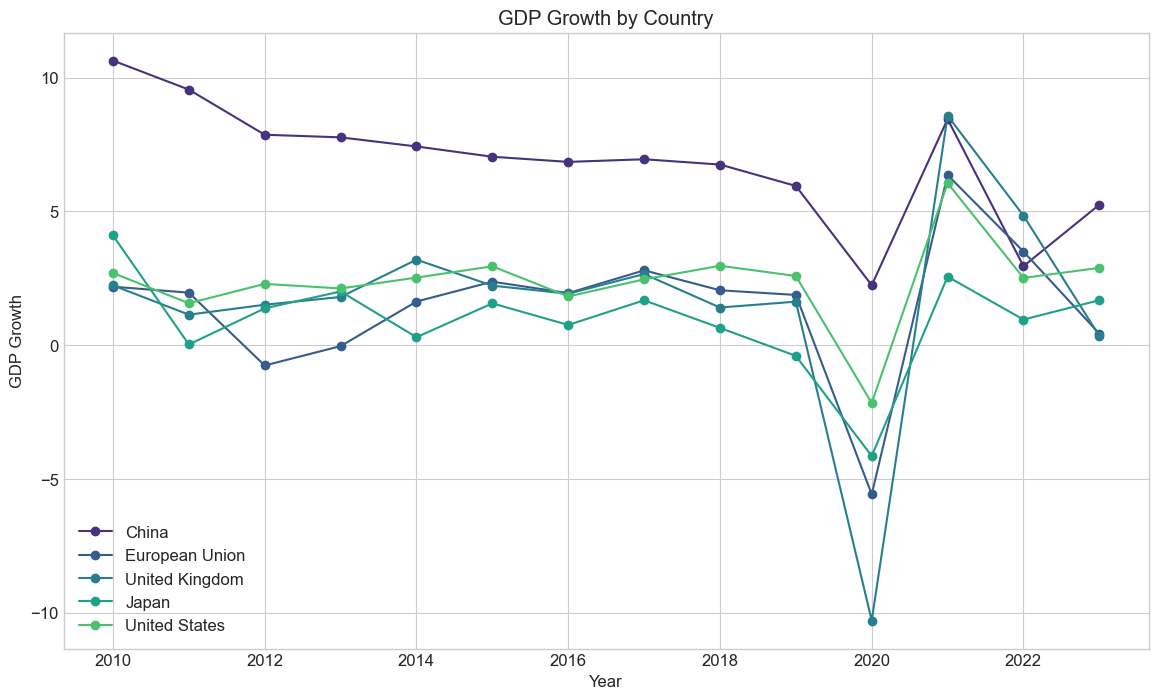

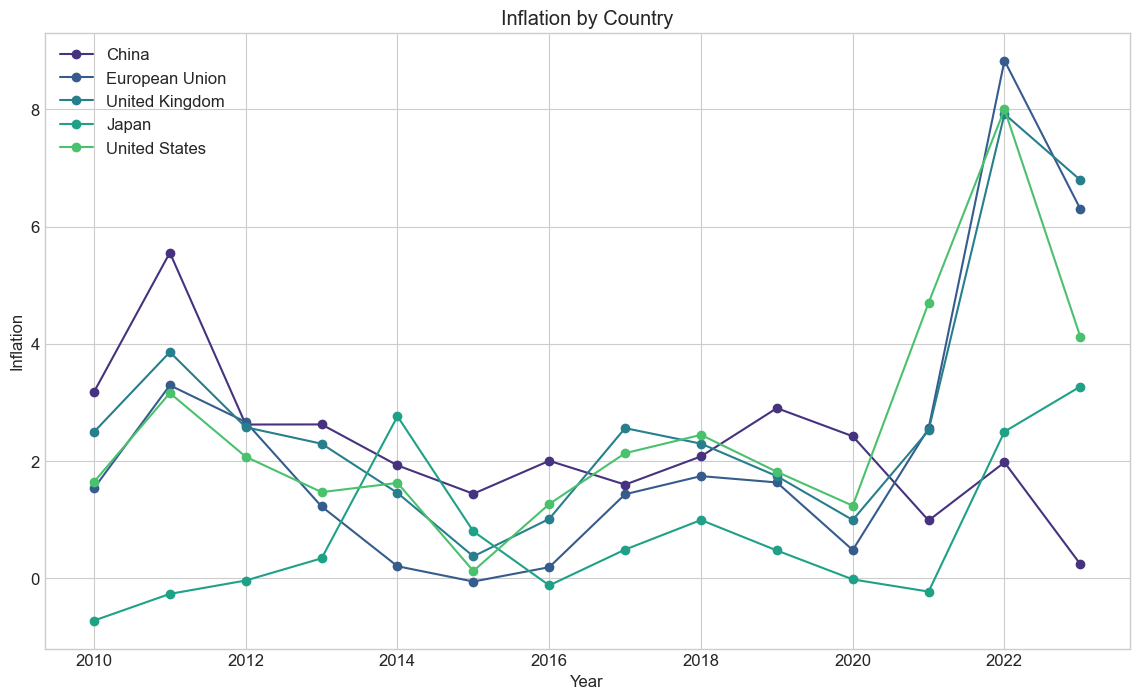

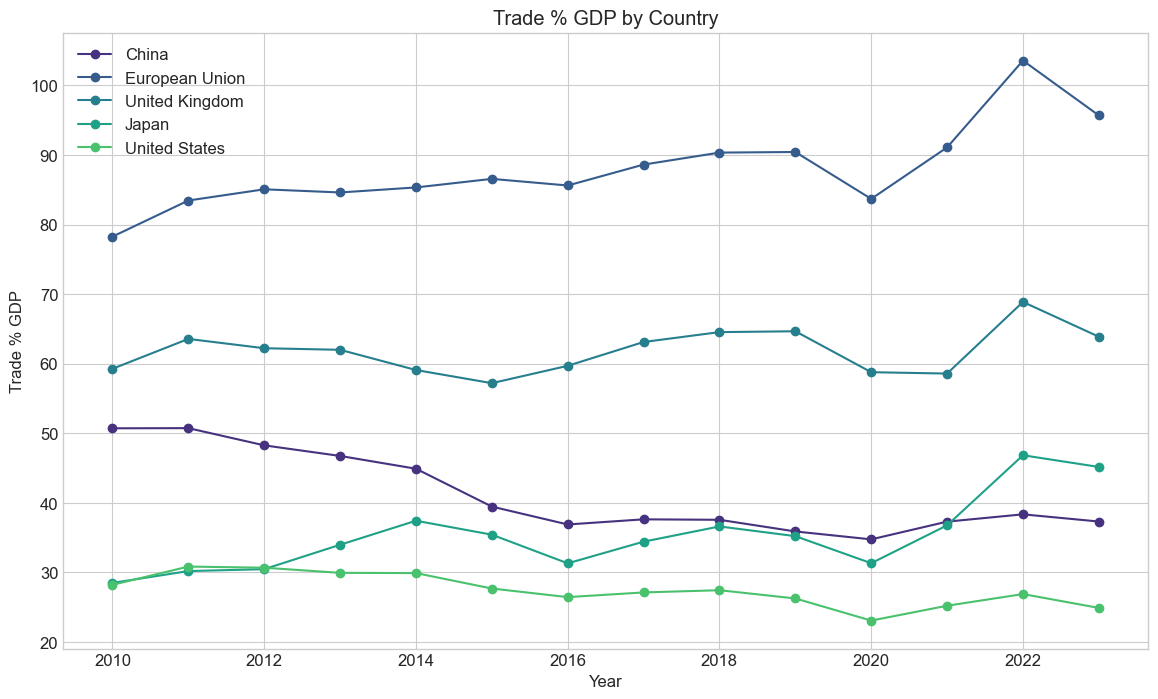

In [16]:
# Display basic information about World Bank data
print("World Bank data shape:", world_bank_data.shape)
print("\nWorld Bank data columns:")
print(world_bank_data.columns)

# Check first few rows
print("\nFirst few rows of World Bank data:")
world_bank_data.head()

# Explore data for different countries
countries = world_bank_data['country'].unique()
indicators = [col for col in world_bank_data.columns if col not in ['country', 'year', 'date']]

# Plot indicators for each country
for indicator in indicators:
    plt.figure(figsize=(14, 8))
    for country in countries:
        country_data = world_bank_data[world_bank_data['country'] == country]
        plt.plot(country_data['year'], country_data[indicator], marker='o', label=country)
    plt.title(f'{indicator} by Country')
    plt.xlabel('Year')
    plt.ylabel(indicator)
    plt.legend()
    plt.grid(True)
    plt.show()

## Analysis of World Bank Global Economic Data

## 1. GDP Growth by Country (Image 1)

This visualization shows the annual GDP growth rates for China, the European Union, United Kingdom, Japan, and the United States.

**Key Observations:**

1. **China's Exceptional Growth and Moderation**:
   - China maintained significantly higher growth rates (6-10%) than other major economies from 2010-2019
   - A clear downward trend from ~10% in 2010 to ~6% by 2019, showing China's gradual transition from hypergrowth to more sustainable growth
   - China experienced a less severe COVID contraction than Western economies in 2020
   - Post-COVID recovery followed by growth moderation in 2022-2023

2. **Synchronized Global Pandemic Impact**:
   - The dramatic V-shaped pattern in 2020-2021 shows the unprecedented nature of the COVID economic shock
   - The UK experienced the most severe contraction (~10% decline)
   - All economies showed extraordinary growth in 2021 during the recovery phase
   - Growth rates normalized by 2022-2023

3. **Developed Economy Convergence**:
   - The US, EU, UK, and Japan followed relatively similar growth patterns (1-3% range) pre-pandemic
   - Japan consistently showed the lowest growth among developed economies
   - Post-pandemic, growth patterns have begun to diverge again

## 2. Inflation by Country (Image 2)

This chart tracks inflation rates across the same economies over the 2010-2023 period.

**Key Observations:**

1. **The Global Inflation Surge of 2021-2022**:
   - All economies experienced dramatic inflation increases in 2021-2022
   - The UK reached the highest peak at ~9%, followed closely by the EU at ~8.5%
   - By 2023, inflation had begun to moderate across all economies but remained elevated

2. **Japan's Persistent Deflationary Tendencies**:
   - Japan uniquely experienced periods of deflation (negative inflation) in 2010 and 2020
   - Even during the global inflation surge, Japan's inflation remained more moderate
   - This reflects Japan's decades-long struggle with deflationary pressures

3. **China's Unusual Inflation Pattern**:
   - China experienced early inflation peaks around 2011-2012
   - During the 2021-2022 global inflation surge, China's inflation remained remarkably contained
   - By 2023, China's inflation actually decreased to near zero, counter to global trends

4. **Inflation Synchronicity and Divergence**:
   - Pre-2020: Moderate and relatively stable inflation across economies
   - 2021-2022: Highly synchronized global inflation surge
   - 2023: Beginning of divergence as economies respond differently to monetary tightening

## 3. Trade % GDP by Country (Image 3)

This visualization shows trade (imports plus exports) as a percentage of GDP, indicating each economy's integration with global markets.

**Key Observations:**

1. **Structural Differences in Trade Orientation**:
   - Clear tiering of economies by trade dependence:
     - EU: Highest (~85-100% of GDP)
     - UK: High (~60-65% of GDP)
     - Japan: Moderate (~35-45% of GDP)
     - China: Declining (~50% to ~35%)
     - US: Lowest (~25-30% of GDP)

2. **China's Declining Trade Intensity**:
   - China shows a clear downward trend from ~50% in 2010 to ~35% by 2023
   - Reflects China's strategic shift toward domestic consumption and less export dependence
   - Brief uptick in 2021-2022 during the global recovery

3. **Post-Pandemic Trade Surge**:
   - All economies experienced increased trade intensity in 2021-2022
   - Most pronounced for the EU, which reached over 100% of GDP
   - Likely reflects both recovery in trade volumes and inflation effects on nominal values

4. **US Relative Insularity**:
   - The US consistently maintains the lowest trade intensity (~25-30% of GDP)
   - Shows relative insularity and lower dependence on international trade
   - Explains why the US economy can sometimes be less affected by global trade disruptions

## Investment Implications and Portfolio Insights

Based on this global economic data, here are key insights for investment portfolio construction:

1. **Geographic Diversification Remains Valuable**:
   - Divergent growth and inflation patterns confirm the benefits of global diversification
   - China's different inflation and growth trajectory offers diversification benefits

2. **Trade Exposure as a Risk Factor**:
   - Companies in high-trade economies (EU, UK) may face greater exposure to global disruptions
   - US companies, with lower trade dependence, may offer more insulation during global trade tensions

3. **Inflation Regime Considerations**:
   - The synchronized global inflation surge suggests macroeconomic forces that transcend national policies
   - However, China and Japan demonstrate that country-specific factors can still lead to divergent inflation outcomes
   - Investment strategies should consider both global and country-specific inflation drivers

4. **Growth Outlook Differentiation**:
   - China's growth moderation suggests a structural shift that will affect long-term returns in Chinese equities
   - Developed markets show convergence in growth rates, suggesting less differentiation based solely on economic growth
   - Post-pandemic recovery patterns may provide insights into economic resilience for future shocks

5. **Economic Coupling and Decoupling**:
   - The pandemic demonstrated the high degree of global economic coupling during crises
   - However, post-pandemic recovery shows increasing divergence
   - This suggests portfolio construction should consider both systematic global risks and country-specific factors

## 7. Calculate Asset Correlations

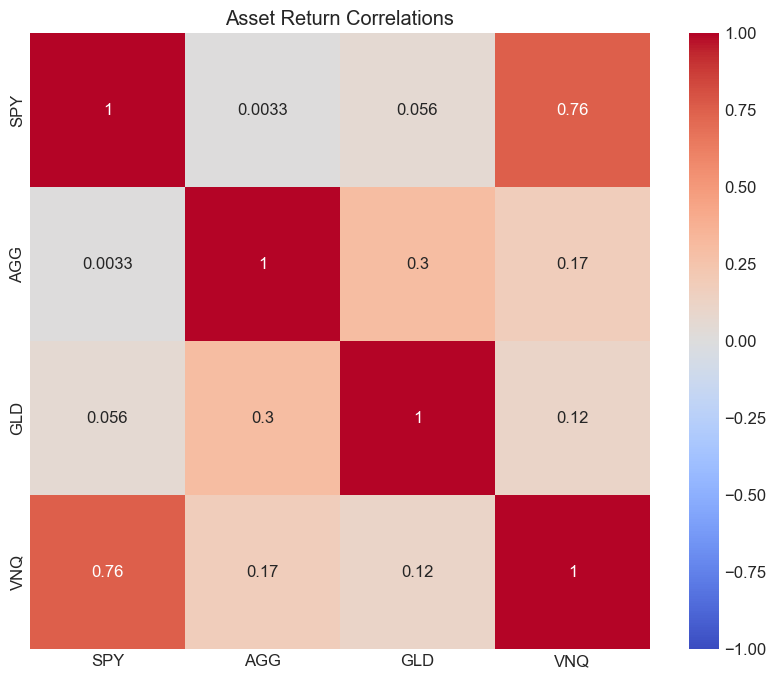

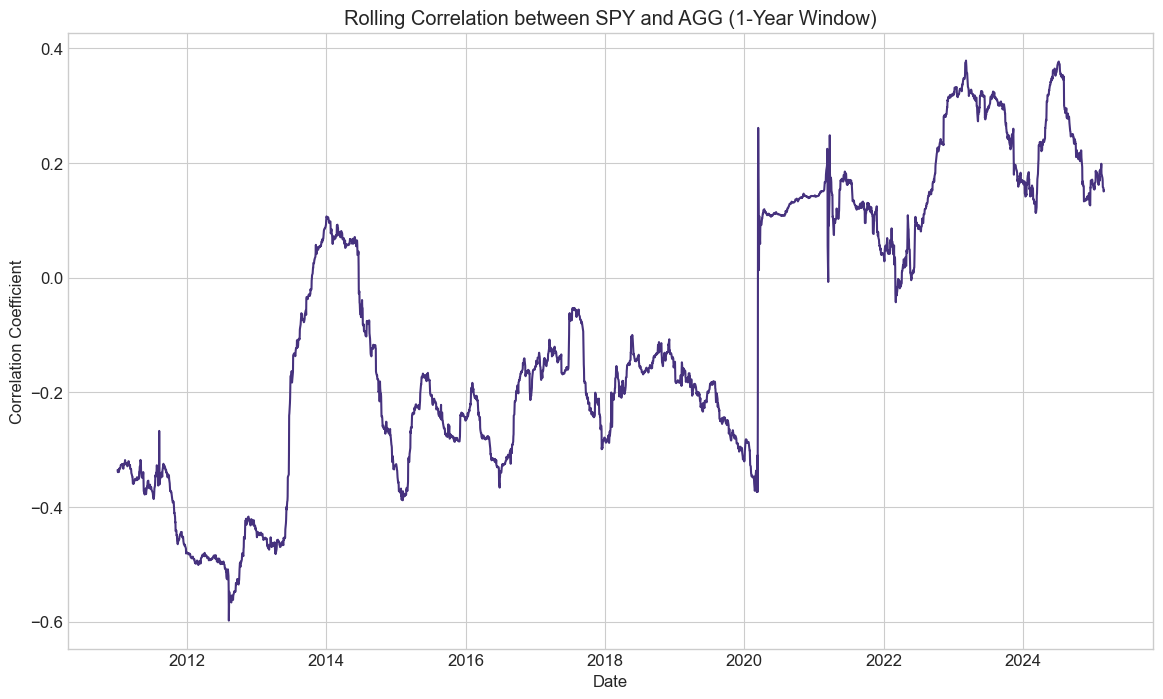

In [18]:
# Calculate correlations between asset returns
correlation_matrix = returns.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Asset Return Correlations')
plt.show()

# Calculate rolling correlations to see how they change over time
rolling_window = 252  # Approximately 1 year of trading days
rolling_corr = returns['SPY'].rolling(rolling_window).corr(returns['AGG'])

plt.figure(figsize=(14, 8))
plt.plot(rolling_corr.index, rolling_corr)
plt.title('Rolling Correlation between SPY and AGG (1-Year Window)')
plt.xlabel('Date')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

## Analysis of Asset Correlations for Portfolio Construction

## Asset Return Correlations Heatmap (Image 1)

This correlation matrix reveals the relationships between your four key asset classes:

### Key Observations:

1. **SPY-AGG Correlation (0.0033)**:
   - The near-zero correlation between U.S. equities (SPY) and bonds (AGG) is a portfolio construction goldmine
   - This confirms the classic stock-bond diversification benefit that forms the foundation of most balanced portfolios
   - This extremely low correlation suggests bonds can effectively hedge equity risk

2. **SPY-VNQ Correlation (0.76)**:
   - The high correlation between U.S. equities and REITs indicates significant shared risk
   - This suggests that real estate (VNQ) may not provide as much diversification from broad market risk as commonly assumed
   - During market downturns, REITs may not offer substantial protection from equity market declines

3. **Gold's Modest Correlations**:
   - Gold (GLD) shows low correlations with both equities (0.056) and REITs (0.12)
   - It shows a moderate correlation with bonds (0.30)
   - This confirms gold's role as a partial diversifier in a multi-asset portfolio

4. **Diversification Hierarchy**:
   - From a pure diversification perspective, the assets rank from most to least effective:
     1. Bonds (AGG) - lowest average correlation with other assets
     2. Gold (GLD) - moderate diversification benefits
     3. REITs (VNQ) - higher correlation with equities limits diversification
     4. Equities (SPY) - highest average correlation with other assets

## Rolling Correlation Between SPY and AGG (Image 2)

This time-series analysis of the stock-bond correlation reveals crucial dynamics:

### Key Observations:

1. **Significant Time Variation**:
   - The correlation ranges from strongly negative (-0.6) to moderately positive (0.4)
   - This demonstrates that diversification benefits are not static but fluctuate over time

2. **Pre-2020 Negative Correlation Regime**:
   - From 2010-2019, correlations were predominantly negative
   - This period represents the classic "flight to quality" relationship where bonds rise when stocks fall

3. **Post-2020 Regime Shift**:
   - A dramatic shift occurred around 2020, with correlations turning consistently positive
   - This coincides with the inflation surge and rising interest rate environment
   - Suggests that in high-inflation environments, stocks and bonds may both suffer together

4. **Recent Moderation (2023-2024)**:
   - The correlation has moderated from its peak but remains positive
   - This indicates the relationship is stabilizing but hasn't returned to the pre-2020 negative regime

## Investment Implications

This correlation analysis has profound implications for your portfolio construction approach:

1. **Dynamic Versus Static Diversification**:
   - The significant time variation in correlations argues for dynamic rather than static asset allocation
   - Modern portfolio theory assumptions of stable correlations are clearly violated

2. **Risk Management During Regime Changes**:
   - The dramatic shift in the stock-bond relationship after 2020 shows how macro regimes affect diversification
   - Portfolio stress testing should consider scenarios where traditional diversification fails

3. **Inflation's Impact on Asset Relationships**:
   - The post-2020 positive correlation coincides with high inflation
   - This suggests adding specific inflation hedges may be necessary when traditional diversification breaks down

4. **Optimal Portfolio Construction**:
   - Include substantial bond allocations despite the recent positive correlation shift
   - Consider gold as a partial diversifier, especially given its lower correlations
   - Be cautious about over-reliance on REITs for diversification from equity risk
   - Monitor correlation regimes and adjust allocations accordingly

5. **Enhanced Diversification Strategies**:
   - Seek additional diversifiers not represented in your current analysis (e.g., commodities, TIPS, international bonds)
   - Consider tactical shifts based on correlation trends
   - Implement options strategies during periods of high positive correlation between stocks and bonds

## 8. Perform Risk Analysis

Annualized Volatility (%):
SPY    17.014553
AGG     4.749973
GLD    15.482892
VNQ    20.674756
dtype: float64


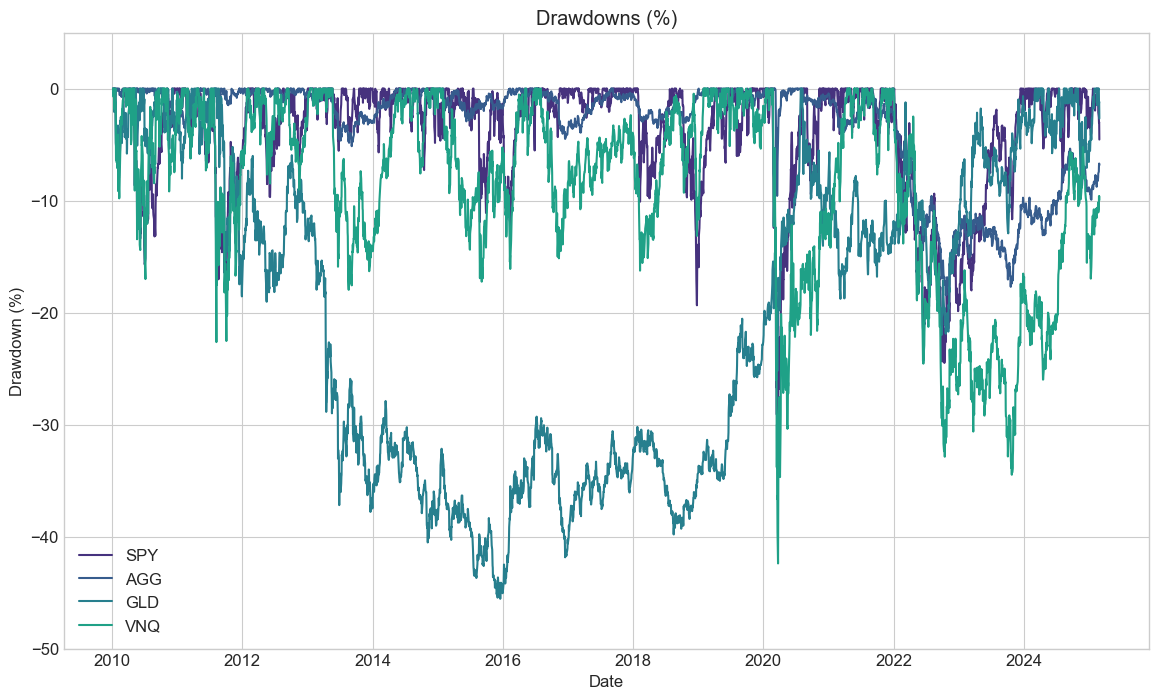


Maximum Drawdowns (%):
SPY   -33.717264
AGG   -18.432950
GLD   -45.555013
VNQ   -42.398173
dtype: float64


In [19]:
# Calculate volatility (annualized)
volatility = returns.std() * np.sqrt(252) * 100  # Annualized and in percentage
print("Annualized Volatility (%):")
print(volatility)

# Calculate drawdowns
def calculate_drawdowns(return_series):
    wealth_index = (1 + return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks) / previous_peaks
    return drawdowns

drawdowns = pd.DataFrame()
for ticker in returns.columns:
    drawdowns[ticker] = calculate_drawdowns(returns[ticker])

# Plot drawdowns
plt.figure(figsize=(14, 8))
for ticker in drawdowns.columns:
    plt.plot(drawdowns.index, drawdowns[ticker] * 100, label=ticker)
plt.title('Drawdowns (%)')
plt.xlabel('Date')
plt.ylabel('Drawdown (%)')
plt.legend()
plt.grid(True)
plt.ylim(-50, 5)  # Adjust as needed
plt.show()

# Calculate maximum drawdown for each asset
max_drawdowns = drawdowns.min() * 100
print("\nMaximum Drawdowns (%):")
print(max_drawdowns)

## Risk Analysis: Volatility and Drawdowns

## Annualized Volatility Analysis (Image 1)

The annualized volatility metrics reveal the expected yearly price fluctuation for each asset:

1. **VNQ (Real Estate): 20.67%**
   - Highest volatility among your assets
   - Indicates real estate investments experience the most extreme price swings
   - This higher volatility should be compensated with higher expected returns

2. **SPY (US Equities): 17.01%**
   - Second highest volatility
   - Aligned with typical long-term US equity market volatility
   - Represents the baseline market risk for a diversified portfolio

3. **GLD (Gold): 15.48%**
   - Moderate volatility
   - Despite gold's reputation as a "safe haven," it still exhibits significant price fluctuations
   - Volatility is lower than equities but much higher than bonds

4. **AGG (Bonds): 4.75%**
   - Dramatically lower volatility than other assets
   - Approximately one-fourth the volatility of equities
   - Confirms bonds' role as the portfolio stabilizer

The volatility hierarchy clearly demonstrates why bonds are crucial for risk reduction, while also showing that real estate investments may require careful position sizing due to their elevated volatility.

## Drawdown Analysis (Images 2 & 3)

The drawdown visualization and maximum drawdown metrics reveal how assets behave during stress periods:

1. **GLD (Gold): -45.55% Maximum Drawdown**
   - Surprisingly severe maximum drawdown
   - Occurred during the 2013-2015 period
   - Challenges gold's reputation as a reliable safe haven
   - Shows extended multi-year recovery periods

2. **VNQ (Real Estate): -42.40% Maximum Drawdown**
   - Two major drawdown periods: 2020 COVID crash and 2022 interest rate hikes
   - Fast V-shaped recovery after 2020
   - Slower recovery after 2022 drawdown
   - Demonstrates real estate's sensitivity to interest rate changes

3. **SPY (US Equities): -33.71% Maximum Drawdown**
   - Sharpest decline during the March 2020 COVID crash
   - Quick recovery compared to other assets
   - Smaller but still significant drawdown during 2022 market correction
   - Represents typical equity market behavior during crises

4. **AGG (Bonds): -18.43% Maximum Drawdown**
   - Much smaller drawdowns than other assets
   - Largest decline coincided with 2022 interest rate hikes
   - Shows bonds' vulnerability during inflation/rising rate environments
   - Still provided significant downside protection compared to other assets

## Integrated Risk Analysis and Portfolio Implications

Combining the volatility and drawdown insights reveals several critical portfolio construction implications:

1. **Diversification Benefits and Limitations**
   - Bonds provide substantial volatility reduction but aren't immune to drawdowns
   - The 2022 period shows bonds and equities can both experience drawdowns simultaneously
   - Gold's severe drawdowns question its effectiveness as a reliable portfolio hedge

2. **Risk-Return Efficiency**
   - Equities (SPY) demonstrate better risk-adjusted behavior than real estate (VNQ)
   - VNQ has both higher volatility and worse drawdowns than SPY
   - This suggests careful consideration of real estate allocation sizing

3. **Drawdown Recovery Patterns**
   - Gold shows concerning extended drawdown periods with slow recoveries
   - Equities demonstrate relatively quick recovery from drawdowns
   - Real estate shows mixed recovery speed depending on the market environment

4. **Time-Varying Risk**
   - All assets show periods of both elevated and reduced risk
   - This supports dynamic rather than static risk management
   - Particularly visible in the changing drawdown patterns across market regimes

5. **Portfolio Risk Management Strategies**
   - **Core Bond Allocation**: Maintain a significant AGG position despite recent underperformance
   - **Gold Allocation Caution**: Consider smaller strategic gold positions given its severe drawdowns
   - **Tactical Adjustment**: Increase focus on entering positions after significant drawdowns
   - **Volatility Management**: Implement position sizing that accounts for volatility differences

## 9. Analyse Relationship Between Economic Indicators and Asset Returns

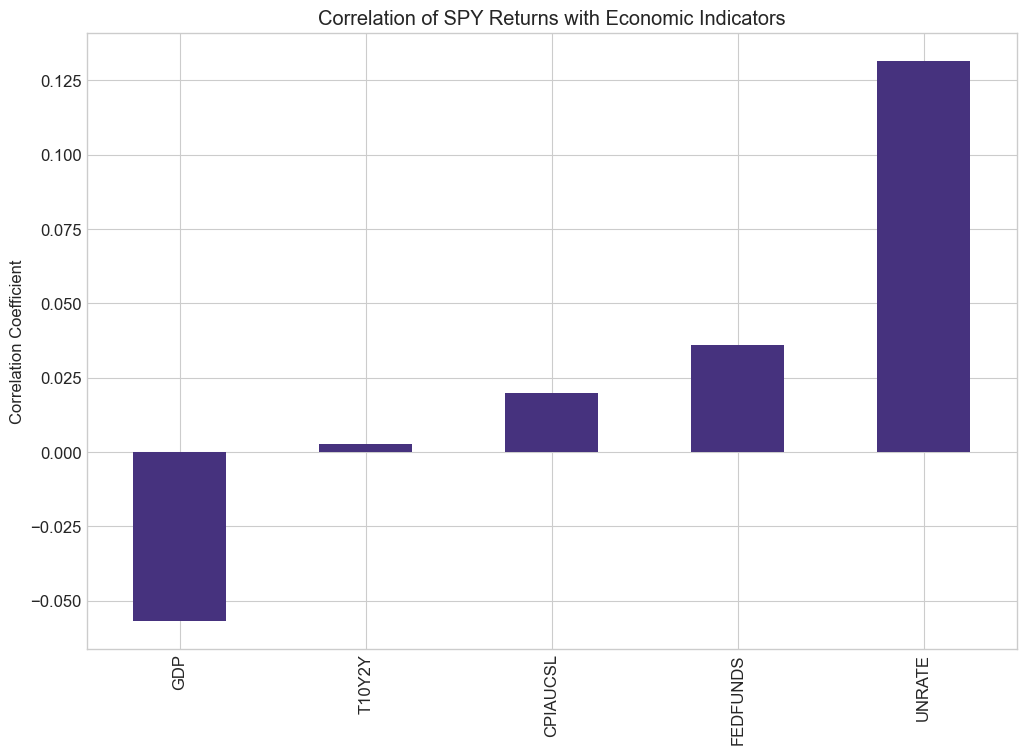

In [21]:
# Align economic data with monthly stock returns
monthly_returns = returns.resample('ME').apply(lambda x: (1 + x).prod() - 1)
monthly_economic = economic_data.resample('ME').last()

# Create aligned dataset
aligned_data = pd.merge(
    monthly_returns, 
    monthly_economic,
    left_index=True,
    right_index=True,
    how='inner'
)

# Calculate correlations
economic_correlations = aligned_data.corr()

# Plot correlations between SPY returns and economic indicators
plt.figure(figsize=(12, 8))
economic_corr_with_spy = economic_correlations.loc['SPY', economic_data.columns]
economic_corr_with_spy.sort_values().plot(kind='bar')
plt.title('Correlation of SPY Returns with Economic Indicators')
plt.ylabel('Correlation Coefficient')
plt.grid(True)
plt.show()

## Analysis of SPY Returns and Economic Indicators Relationship

## Key Observations

### 1. Unemployment Rate (UNRATE): Highest Positive Correlation (+0.13)

The strongest relationship appears between stock returns and unemployment. This **positive correlation** is particularly interesting and potentially counterintuitive since:

- Conventional wisdom might suggest higher unemployment would correlate with lower stock returns
- This positive relationship could indicate that markets respond favorably to rising unemployment because it signals potential Federal Reserve easing
- Alternatively, it may reflect that unemployment is a lagging indicator, rising after economic downturns when markets have already begun to recover
- Markets often rally on bad economic news if it implies more accommodative monetary policy

### 2. Federal Funds Rate (FEDFUNDS): Moderate Positive Correlation (+0.035)

The federal funds rate shows a mild positive correlation with stock returns, suggesting:

- Rising interest rates have historically coincided with modestly positive equity performance
- This challenges the simplistic view that higher rates are always negative for stocks
- The relationship likely varies across different rate regimes (zero bound vs. normalized rates)
- Markets may respond positively to rate hikes that are seen as confirmation of economic strength

### 3. Consumer Price Index (CPIAUCSL): Slight Positive Correlation (+0.02)

Inflation shows a very slight positive correlation with equity returns:

- This suggests a mild tendency for stocks to perform better during periods of rising inflation
- The weak correlation indicates inflation's complex relationship with equities
- Moderate inflation may signal healthy economic growth, benefiting corporate earnings
- The relationship may not be linear across different inflation regimes (low, moderate, high)

### 4. Treasury Yield Spread (T10Y2Y): Negligible Correlation (+0.003)

The yield curve spread shows virtually no correlation with stock returns:

- This suggests the yield curve's predictive power may be more about future economic conditions than immediate market impacts
- The near-zero correlation indicates timing mismatches between yield curve changes and equity performance
- The relationship may be non-linear or regime-dependent, not captured by simple correlation

### 5. GDP: Negative Correlation (-0.055)

The only negative correlation appears with GDP, suggesting:

- Stock returns have historically been slightly worse during periods of stronger GDP growth
- This counterintuitive finding likely reflects markets as forward-looking mechanisms
- Stocks may perform better when GDP is weak because investors anticipate future improvement
- This negative correlation aligns with the "bad news is good news" phenomenon in markets

## Investment Implications

1. **Forward-Looking Nature of Markets**
   - The negative GDP correlation and positive unemployment correlation highlight how markets look forward rather than respond to current conditions
   - Investment strategies based on current economic readings may perform poorly

2. **Monetary Policy Signaling**
   - The positive correlations with both unemployment and interest rates suggest markets respond more to what these indicators signal about future Fed policy than to their direct economic impacts
   - Consider positioning portfolios based on anticipated policy shifts rather than economic data itself

3. **Regime-Dependent Relationships**
   - The relatively low correlations across all indicators suggest these relationships are not stable or linear
   - Portfolio strategies should adapt to different economic regimes rather than assume fixed relationships

4. **Limited Predictive Value**
   - The weak correlations suggest limited value in using any single economic indicator for market timing
   - A multifactor approach integrating various economic signals would likely prove more robust

5. **Counter-Cyclical Investment Approach**
   - The data supports a somewhat counter-cyclical approach to equity allocation
   - Consider increasing equity exposure when economic data weakens and reducing it when data is consistently strong

These findings highlight the complex and sometimes counterintuitive relationships between economic indicators and market returns. For your investment portfolio analytics project, I recommend developing a regime-based framework that accounts for how these relationships change under different economic conditions rather than assuming static correlations.

## 10. Identify Market Regimes

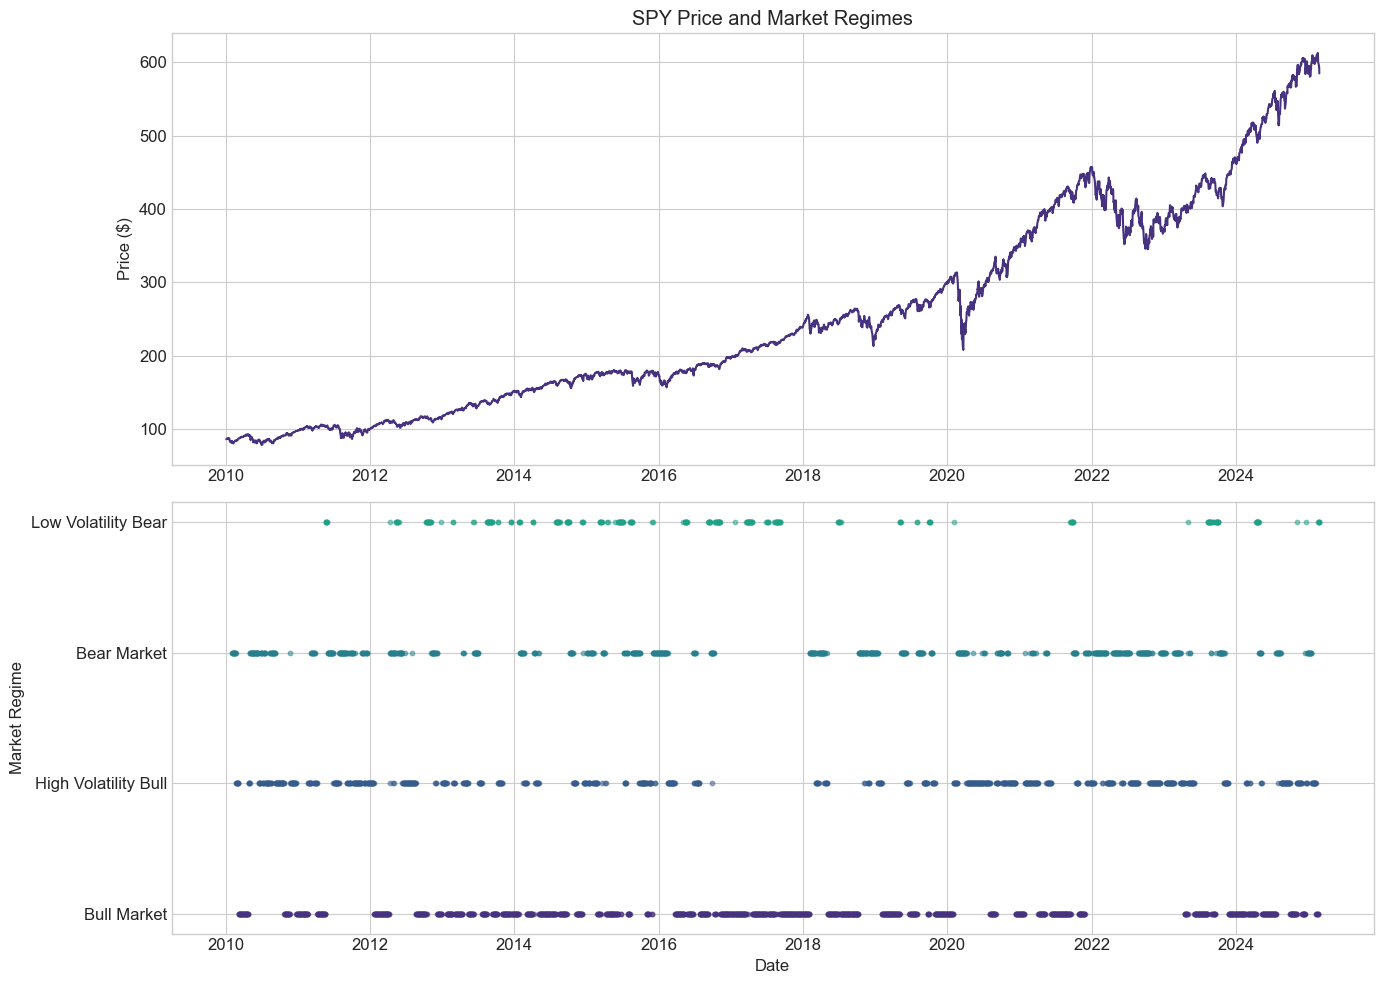

Average Daily Returns (%) by Market Regime:
     Bull Market  High Volatility Bull  Bear Market  Low Volatility Bear
SPY     0.095239              0.265172    -0.171489            -0.194231
AGG     0.003482              0.019558     0.005200             0.023411
GLD     0.000955              0.088142     0.024867            -0.017954
VNQ     0.031826              0.262984    -0.137506            -0.095430


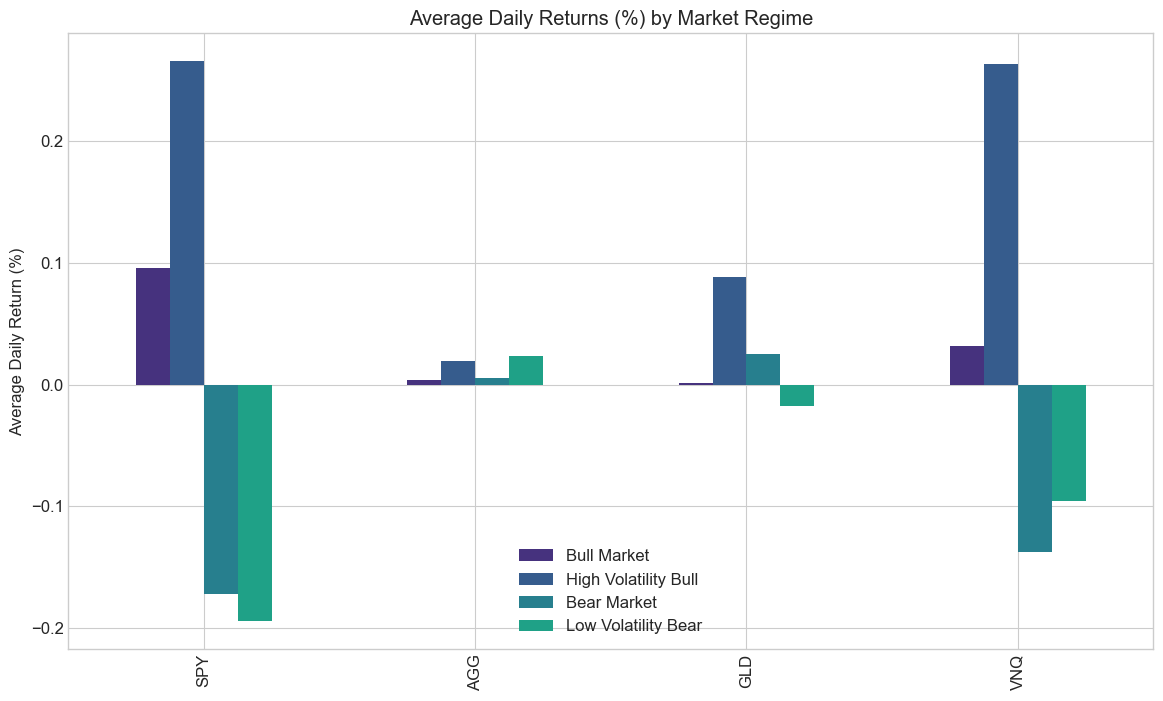

In [22]:
# Create a simple regime classification based on SPY returns and volatility
rolling_returns = returns['SPY'].rolling(window=21).mean() * 21  # ~1 month return
rolling_vol = returns['SPY'].rolling(window=21).std() * np.sqrt(21)  # ~1 month volatility

regimes = pd.DataFrame({
    'returns': rolling_returns,
    'volatility': rolling_vol
})

# Create regime classifications
regimes['regime'] = 0  # Default
regimes.loc[(regimes['returns'] > 0) & (regimes['volatility'] < rolling_vol.median()), 'regime'] = 1  # Bull market
regimes.loc[(regimes['returns'] > 0) & (regimes['volatility'] > rolling_vol.median()), 'regime'] = 2  # High vol bull
regimes.loc[(regimes['returns'] < 0) & (regimes['volatility'] > rolling_vol.median()), 'regime'] = 3  # Bear market
regimes.loc[(regimes['returns'] < 0) & (regimes['volatility'] < rolling_vol.median()), 'regime'] = 4  # Low vol bear

# Map regime numbers to names
regime_names = {
    1: "Bull Market",
    2: "High Volatility Bull",
    3: "Bear Market", 
    4: "Low Volatility Bear"
}
regimes['regime_name'] = regimes['regime'].map(regime_names)

# Plot regimes over time
plt.figure(figsize=(14, 10))

# Plot SPY price
ax1 = plt.subplot(211)
ax1.plot(stock_data.index, stock_data['SPY']['Close'])
ax1.set_title('SPY Price and Market Regimes')
ax1.set_ylabel('Price ($)')
ax1.grid(True)

# Plot regimes
ax2 = plt.subplot(212, sharex=ax1)
for regime in range(1, 5):
    regime_data = regimes[regimes['regime'] == regime]
    if not regime_data.empty:
        ax2.scatter(regime_data.index, [regime] * len(regime_data), 
                   label=regime_names.get(regime, f"Regime {regime}"),
                   s=10, alpha=0.5)

ax2.set_yticks(list(range(1, 5)))
ax2.set_yticklabels([regime_names.get(i, f"Regime {i}") for i in range(1, 5)])
ax2.set_xlabel('Date')
ax2.set_ylabel('Market Regime')
ax2.grid(True)

plt.tight_layout()
plt.show()

# Calculate asset performance in different regimes
regime_performance = {}
for regime in range(1, 5):
    regime_dates = regimes[regimes['regime'] == regime].index
    regime_returns = returns.loc[regime_dates]
    
    # Calculate average daily return in this regime
    if not regime_returns.empty:
        avg_returns = regime_returns.mean() * 100  # Convert to percentage
        regime_performance[regime_names.get(regime, f"Regime {regime}")] = avg_returns

regime_performance_df = pd.DataFrame(regime_performance)
print("Average Daily Returns (%) by Market Regime:")
print(regime_performance_df)

# Plot average returns by regime
regime_performance_df.plot(kind='bar', figsize=(14, 8))
plt.title('Average Daily Returns (%) by Market Regime')
plt.ylabel('Average Daily Return (%)')
plt.grid(True)
plt.show()

## Market Regime Analysis and Investment Implications

## Understanding the Market Regimes

Analysis identifies four distinct market regimes based on return and volatility characteristics:

1. **Bull Market**: Positive returns with below-median volatility
2. **High Volatility Bull**: Positive returns with above-median volatility
3. **Bear Market**: Negative returns with above-median volatility
4. **Low Volatility Bear**: Negative returns with below-median volatility

## Key Insights from the Regime Analysis

### Regime Distribution (Image 2)

The dot plot visualization reveals several important patterns:

1. **Regime Persistence**: 
   - Bull market conditions (both regular and high-volatility) appear to cluster in extended periods
   - The market spends considerable time in each regime before transitioning
   - This suggests regime identification can provide actionable investment horizons

2. **Cyclical Patterns**:
   - Clear rotation through different regimes over the 2010-2025 period
   - Extended bull markets (especially 2016-2018) followed by transitions to bear conditions
   - High volatility bull conditions often precede bear markets, serving as a potential warning sign

3. **Regime Frequency**:
   - High Volatility Bull and Bear Market regimes appear most frequently
   - Pure Bull Market regimes seem less common but more persistent when they occur
   - Low Volatility Bear appears to be the least frequent regime

### Asset Performance Across Regimes (Image 3)

The bar chart and data table reveal critical differences in asset behavior:

1. **SPY (Equities)**:
   - Strongest performer in Bull (+0.095%) and especially High Volatility Bull (+0.265%) regimes
   - Significant negative returns in both Bear (-0.171%) and Low Volatility Bear (-0.194%) regimes
   - Demonstrates classic equity risk-return profile with regime dependency

2. **AGG (Bonds)**:
   - Most consistent performer across all regimes
   - Positive returns in all four regimes, though magnitude varies
   - Uniquely, performs best during Low Volatility Bear markets (+0.023%)
   - Confirms bonds' role as portfolio stabilizers

3. **GLD (Gold)**:
   - Shows unusual pattern of positive performance in both Bear (+0.025%) and High Volatility Bull (+0.088%) regimes
   - Negative returns during Low Volatility Bear (-0.018%)
   - Modest positive returns in regular Bull markets (+0.001%)
   - Demonstrates gold's role as both inflation hedge and crisis hedge

4. **VNQ (Real Estate)**:
   - Behavior similar to equities but with more extreme reactions
   - Exceptional returns in High Volatility Bull regime (+0.263%)
   - Severe underperformance in Bear markets (-0.138%)
   - Confirms real estate's equity-like risk profile with higher sensitivity

## Strategic Portfolio Applications

This regime analysis provides a foundation for sophisticated portfolio construction:

1. **Tactical Asset Allocation**:
   - Increase equity exposure during identified Bull Market and High Volatility Bull regimes
   - Shift toward bonds during Bear and Low Volatility Bear regimes
   - Add gold specifically during Bear Market regimes for downside protection

2. **Risk Management**:
   - Use regime identification as an early warning system
   - When transitions to High Volatility Bull occur, consider adding portfolio hedges
   - During persistent Bear regimes, implement more significant defensive positioning

3. **Asset Selection**:
   - During Bull Markets: Focus on quality equities and real estate
   - During High Volatility Bull: Consider more defensive equities but maintain market exposure
   - During Bear Markets: Emphasize bonds and gold
   - During Low Volatility Bear: Maximize bond exposure while minimizing equities and real estate

4. **Portfolio Construction Framework**:
   - Core allocation: AGG for stability across all regimes
   - Growth allocation: SPY for Bull and High Volatility Bull regimes
   - Tactical allocation: GLD for Bear regimes
   - Opportunistic allocation: VNQ for High Volatility Bull regimes

## 11. Conclusion and Next Steps

# Key Observations from Data Exploration

## Asset Performance
- US equities (SPY) delivered exceptional performance with ~600% cumulative returns (2010-2025), significantly outperforming other asset classes
- Real estate (VNQ) showed strong but volatile returns (~250-300% cumulatively) with significant drawdowns during rate-sensitive periods
- Gold (GLD) demonstrated moderate overall returns with extended periods of both outperformance and underperformance
- Bonds (AGG) provided stable but modest returns (~50% cumulatively), fulfilling their role as portfolio stabilizers

## Risk Analysis
- Volatility hierarchy: VNQ (20.7%) > SPY (17.0%) > GLD (15.5%) > AGG (4.7%), confirming bonds' role as portfolio stabilizers
- Maximum drawdowns were severe across all assets: GLD (-45.6%), VNQ (-42.4%), SPY (-33.7%), and AGG (-18.4%)
- Asset correlations reveal excellent diversification benefits: SPY-AGG (0.003), SPY-GLD (0.056), with higher correlation between SPY-VNQ (0.76)
- Stock-bond correlation showed a significant regime shift after 2020, moving from consistently negative to positive correlation

## Economic Relationships
- Equity returns show surprisingly weak or counterintuitive correlations with economic indicators
- Unemployment has the strongest correlation with SPY returns (0.13, positive), suggesting markets respond more to Fed policy signals than economic fundamentals
- GDP shows a slight negative correlation with SPY returns (-0.055), highlighting markets' forward-looking nature
- International economic data shows significant divergence in growth, inflation, and trade patterns across major economies

## Market Regimes
- Four distinct market regimes were identified: Bull Market, High Volatility Bull, Bear Market, and Low Volatility Bear
- High Volatility Bull regime produces the highest returns for equities (0.27%) and real estate (0.26%), but with increased risk
- AGG uniquely delivers positive returns across all regimes, performing best during Low Volatility Bear markets (0.023%)
- Gold demonstrates its diversification value by delivering positive returns during Bear markets (0.025%) when equities struggle

## Factor Analysis
- Market factor (Mkt-RF) delivered strong and consistent performance (~200% cumulative)
- Value factor (HML) experienced significant underperformance, particularly during 2017-2020, with dramatic drawdown during COVID
- Size factor (SMB) showed modest performance before declining after 2021
- Low correlations between factors (especially HML with other factors) confirm the diversification benefits of a multi-factor approach

## Next Steps
1. Implement portfolio construction models using Mean-Variance Optimization and Risk Parity approaches
2. Develop a regime detection model that can identify current market conditions in real-time
3. Create dynamic asset allocation strategies that adjust based on identified regimes
4. Incorporate macroeconomic variables as potential regime indicators and allocation signals
5. Design a comprehensive backtesting framework to evaluate strategy performance across different market environments
6. Develop risk management overlays that respond to changing correlation structures between assets
7. Explore alternative assets that could enhance diversification when traditional correlations break down
8. Build custom factor models that incorporate both established and alternative risk premia